# <u> <center> ***Breast Cancer Analysis*** </center> </u>


In [140]:
"""Load the dataset and check the data: """
## Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import StackingClassifier

%matplotlib inline

#Global Variables:
Accuracy = {}  #Required for accuracy

import warnings
warnings.filterwarnings('ignore')

## Check the datatype: 
pd.set_option('display.max_rows', 1000)

## Load the dataset:
df = pd.read_csv("data.csv")

---


# <center> <b> Data Exploration </b></center>

---
<br/>

In [141]:
# print(df.head)

In [142]:
print("Data set dimensions : {}".format(df.shape))

Data set dimensions : (569, 32)


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [144]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

In [145]:
# checking the cardinality, count, nulls, % of missing values, and mode for the categorical features

def describe_cat(data):
    table=pd.DataFrame(columns = data.select_dtypes("object").columns, index = ["count", "nulls","%miss", 'cardinality', "mode"])
    for col in data.select_dtypes("object").columns :
        table.loc["count"][col] = len(data[data[col].isna()==False])
        table.loc["nulls"][col] = len(data[data[col].isna() == True])
        table.loc["%miss"][col] = table.loc["nulls"][col]/table.loc["count"][col]
        table.loc["cardinality"][col]= len(data[col].unique())
        table.loc["mode"][col]= data[col].value_counts().index[0]    

    return table

In [146]:
describe_cat(df)

diagnosis
count             569
nulls               0
%miss             0.0
cardinality         2
mode                B

---

Null values are already taken care of in the original data file. 

---

In [147]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

---

There are 6 columns with min value <b>"0"</b>

---

In [148]:
# Diagnosis is our target variable
#checking for the unique value of diagnosis.
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [149]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [150]:
df['diagnosis'] = df['diagnosis'].str.replace("B","Benign")
df['diagnosis'] = df['diagnosis'].str.replace("M","Malignant")

In [151]:
#-len(data[col].isna())
len(df[df["concavity_worst"].isna()==False])

569



---



# <center> <b> Data Cleaning </b></center>



---

<br/>

In [152]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [153]:
#check for zero values
count = (df == 0).sum()
print(count)

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64


---

There are exactly 13 rows where 6 columns are having 0. We choose to drop those rows rather than replacing them with the mean. 

---

In [154]:
col = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']

#Dropping the rows containing zero values:
for i in col:
 df = df.loc[df[i] != 0]

In [155]:
# #check for zero values
# count = (df == 0).sum()
# print(count)

In [156]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.560000e+02   556.000000    556.000000      556.000000   556.000000   
mean   3.104770e+07    14.237565     19.259748       92.736673   663.734712   
std    1.263967e+08     3.482170      4.246993       24.006362   350.893313   
min    8.670000e+03     7.691000      9.710000       48.340000   170.400000   
25%    8.691895e+05    11.760000     16.177500       75.845000   427.750000   
50%    9.064145e+05    13.455000     18.855000       87.090000   557.650000   
75%    8.910313e+06    16.040000     21.735000      105.250000   798.050000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       556.000000        556.000000      556.000000           556.000000   
mean          0.096616          0.105679        0.090876             0.050063   
std           0.013895          0.052643        0.079468             0.038517   
min           0.062510          0.019380        0.000692             0.001852   
25%           0.086665          0.066608        0.030880             0.020895   
50%           0.096035          0.095090        0.064905             0.034840   
75%           0.105400          0.130600        0.132325             0.074842   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     556.000000  ...    556.000000     556.000000       556.000000   
mean        0.181278  ...     16.407687      25.679388       108.242878   
std         0.027446  ...      4.797695       6.105744        33.337041   
min         0.116700  ...      8.678000      12.020000        54.490000   
25%         0.161900  ...     13.085000      21.160000        84.567500   
50%         0.179250  ...     15.040000      25.445000        98.320000   
75%         0.195750  ...     19.097500      29.547500       126.750000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   556.000000        556.000000         556.000000       556.000000   
mean    893.412410          0.132824           0.258472         0.278553   
std     569.492912          0.022616           0.156663         0.206803   
min     223.600000          0.081250           0.034320         0.001845   
25%     521.450000          0.117175           0.151175         0.121800   
50%     696.050000          0.131550           0.217000         0.231400   
75%    1106.750000          0.146325           0.341600         0.386200   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            556.000000      556.000000               556.000000  
mean               0.117286        0.290802                 0.084141  
std                0.064087        0.062027                 0.018130  
min                0.008772        0.156500                 0.055040  
25%                0.065713        0.250900                 0.071873  
50%                0.101700        0.282450                 0.080075  
75%                0.163150        0.318850                 0.092095  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

After eliminating <b>"0"</b> from the dataset, the statistics got improved and mean for those 6 features got improved.

In [157]:
def describe_data(data):
    table=pd.DataFrame(columns = data.select_dtypes("float64").columns, index = ["count", "nulls","%miss", 'cardinality', "mode"])
    for col in data.select_dtypes("float64").columns :
        table.loc["count"][col] = len(data[data[col].isna()==False])
        table.loc["nulls"][col] = len(data[data[col].isna() == True])
        table.loc["%miss"][col] = table.loc["nulls"][col]/table.loc["count"][col]
        table.loc["cardinality"][col]= len(data[col].unique())
        table.loc["mode"][col]= data[col].value_counts().index[0]    

    return table

In [158]:
describe_data(df)

radius_mean texture_mean perimeter_mean area_mean smoothness_mean  \
count               556          556            556       556             556   
nulls                 0            0              0         0               0   
%miss               0.0          0.0            0.0       0.0             0.0   
cardinality         444          470            511       526             465   
mode              12.34        19.83          82.61     512.2          0.1007   

            compactness_mean concavity_mean concave points_mean symmetry_mean  \
count                    556            556                 556           556   
nulls                      0              0                   0             0   
%miss                    0.0            0.0                 0.0           0.0   
cardinality              524            536                 541           421   
mode                  0.1206         0.1204             0.02864        0.1893   

            fractal_dimension_mean  ... radius_worst texture_worst  \
count                          556  ...          556           556   
nulls                            0  ...            0             0   
%miss                          0.0  ...          0.0           0.0   
cardinality                    488  ...          447           500   
mode                       0.05907  ...        12.36          17.7   

            perimeter_worst area_worst smoothness_worst compactness_worst  \
count                   556        556              556               556   
nulls                     0          0                0                 0   
%miss                   0.0        0.0              0.0               0.0   
cardinality             501        532              406               518   
mode                  105.9      547.4           0.1415            0.1486   

            concavity_worst concave points_worst symmetry_worst  \
count                   556                  556            556   
nulls                     0                    0              0   
%miss                   0.0                  0.0            0.0   
cardinality             538                  491            491   
mode                 0.4504              0.05556         0.3109   

            fractal_dimension_worst  
count                           556  
nulls                             0  
%miss                           0.0  
cardinality                     523  
mode                        0.07427  

[5 rows x 30 columns]

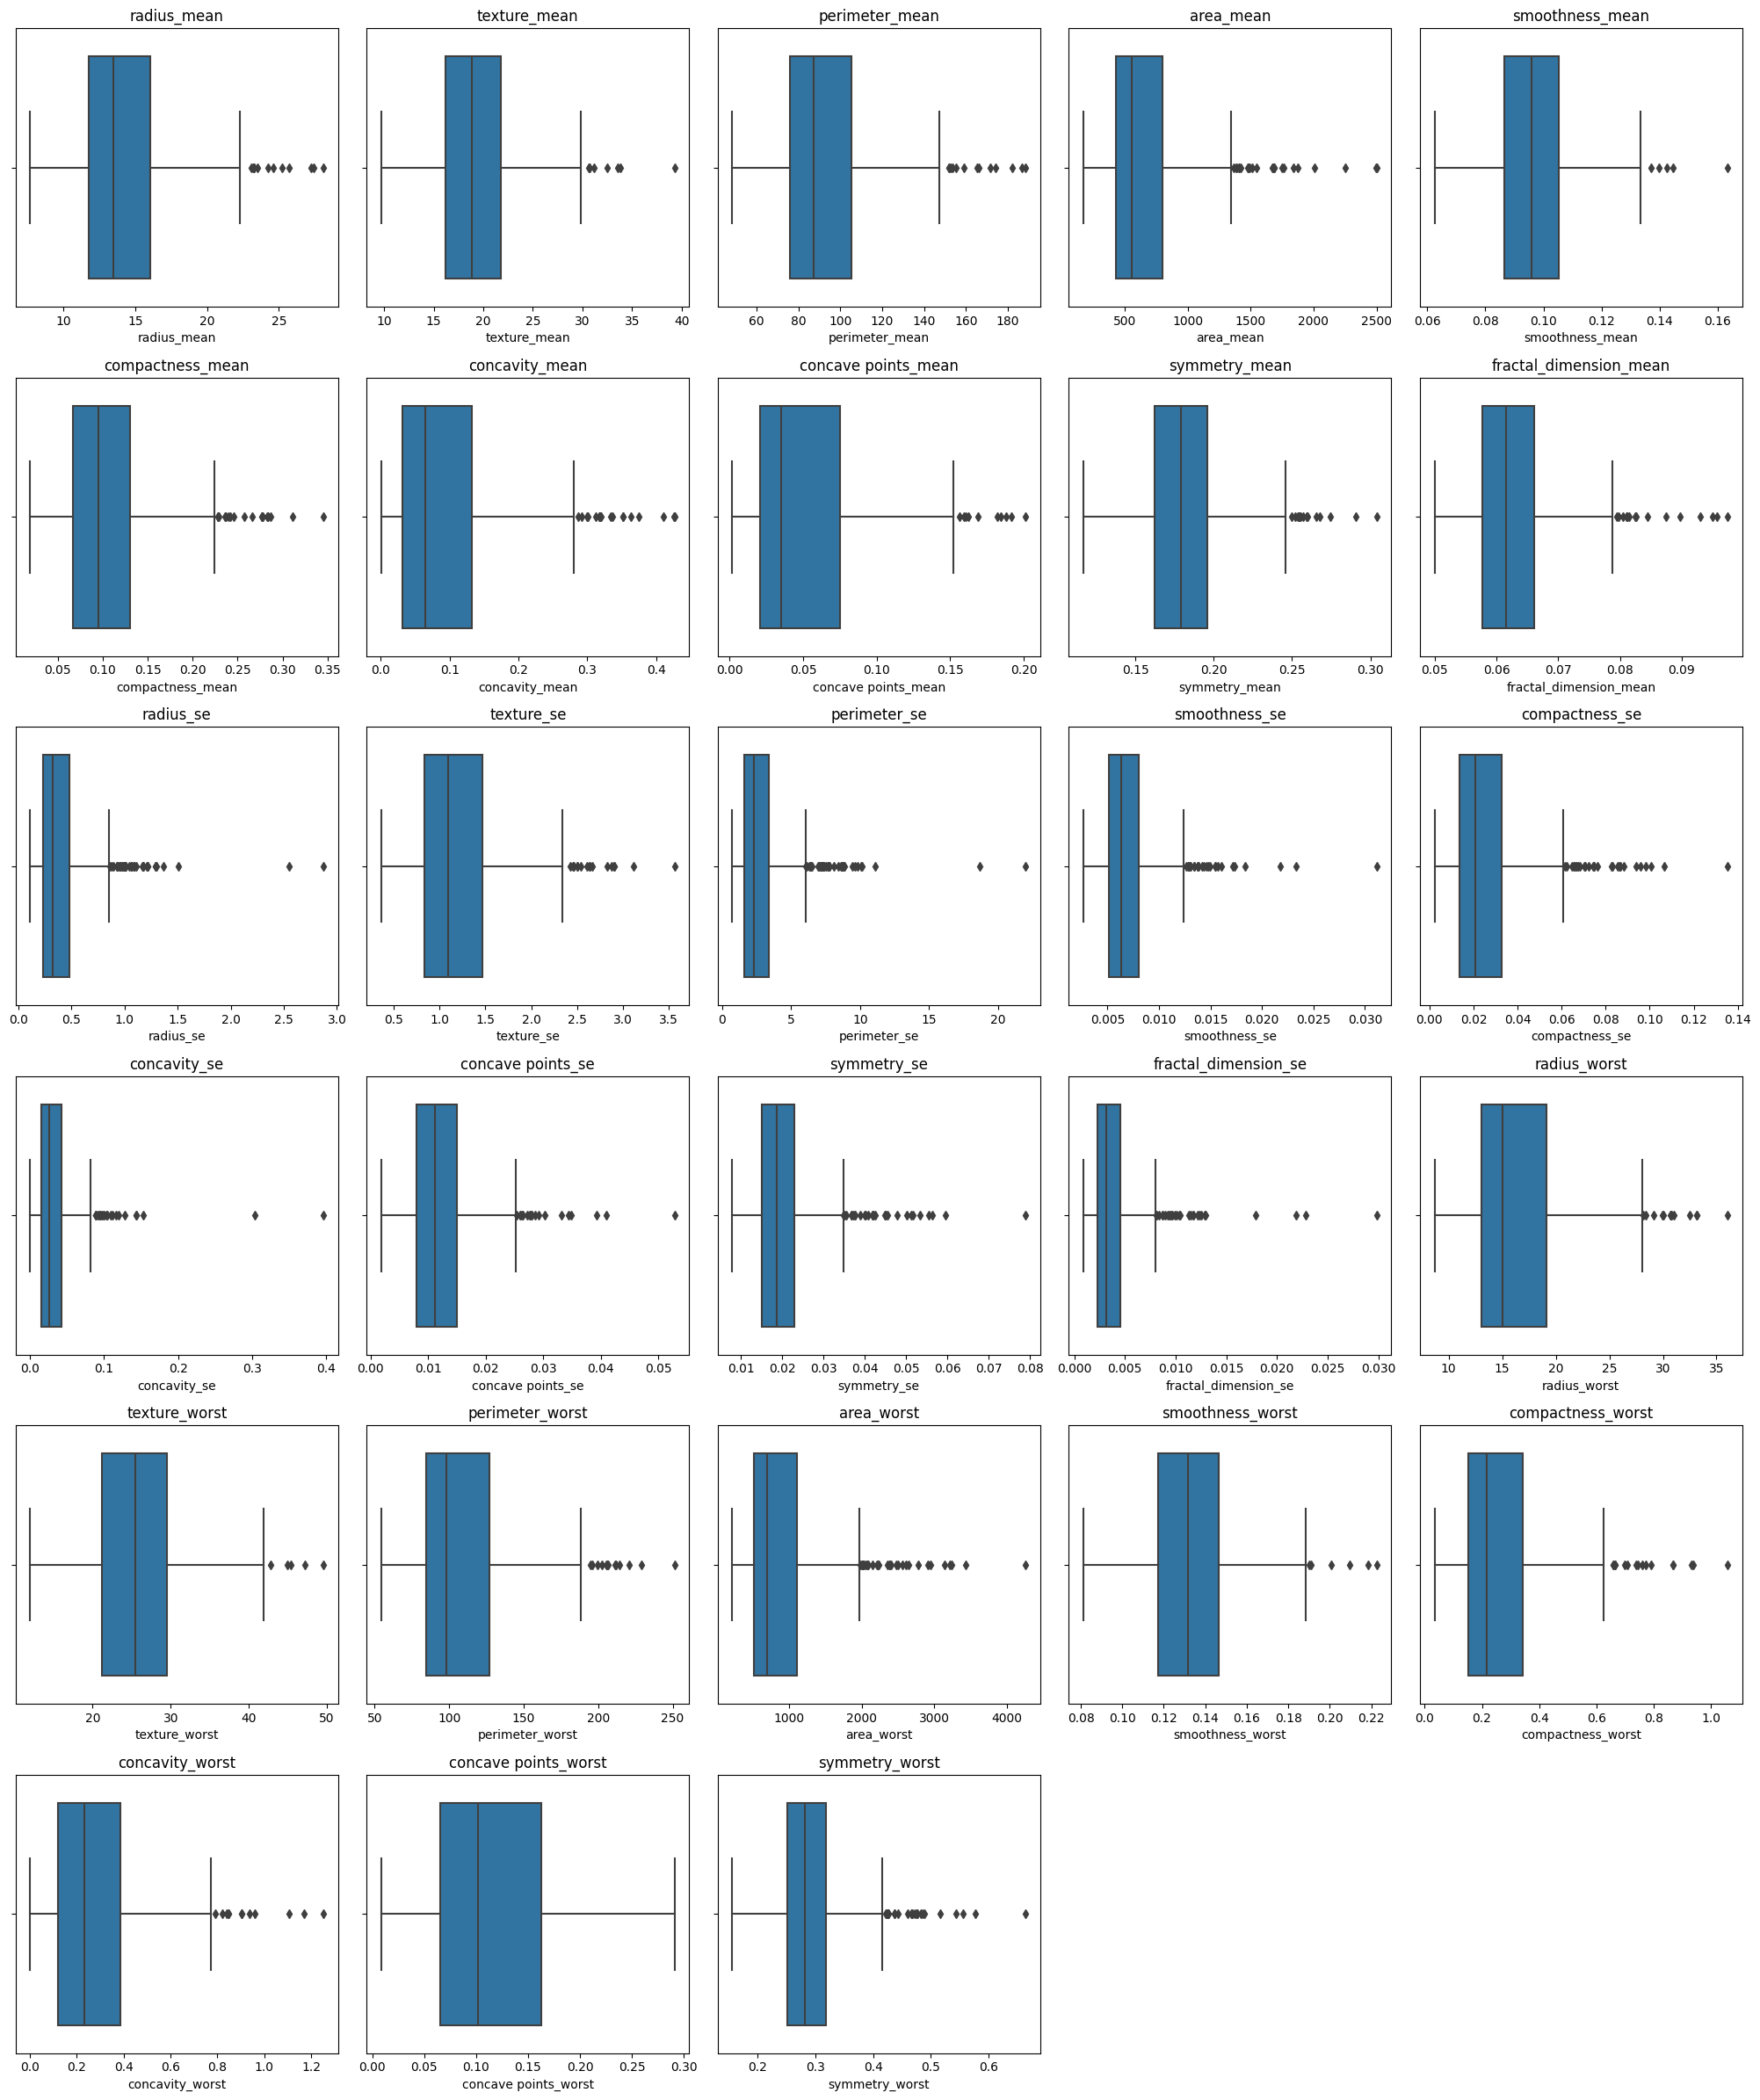

In [159]:
col = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
       'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
       'concave points_worst', 'symmetry_worst']

rows, cols = 6, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 24))
axes = axes.flatten()

for i, feature in enumerate(col):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [160]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.560000e+02   556.000000    556.000000      556.000000   556.000000   
mean   3.104770e+07    14.237565     19.259748       92.736673   663.734712   
std    1.263967e+08     3.482170      4.246993       24.006362   350.893313   
min    8.670000e+03     7.691000      9.710000       48.340000   170.400000   
25%    8.691895e+05    11.760000     16.177500       75.845000   427.750000   
50%    9.064145e+05    13.455000     18.855000       87.090000   557.650000   
75%    8.910313e+06    16.040000     21.735000      105.250000   798.050000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       556.000000        556.000000      556.000000           556.000000   
mean          0.096616          0.105679        0.090876             0.050063   
std           0.013895          0.052643        0.079468             0.038517   
min           0.062510          0.019380        0.000692             0.001852   
25%           0.086665          0.066608        0.030880             0.020895   
50%           0.096035          0.095090        0.064905             0.034840   
75%           0.105400          0.130600        0.132325             0.074842   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     556.000000  ...    556.000000     556.000000       556.000000   
mean        0.181278  ...     16.407687      25.679388       108.242878   
std         0.027446  ...      4.797695       6.105744        33.337041   
min         0.116700  ...      8.678000      12.020000        54.490000   
25%         0.161900  ...     13.085000      21.160000        84.567500   
50%         0.179250  ...     15.040000      25.445000        98.320000   
75%         0.195750  ...     19.097500      29.547500       126.750000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   556.000000        556.000000         556.000000       556.000000   
mean    893.412410          0.132824           0.258472         0.278553   
std     569.492912          0.022616           0.156663         0.206803   
min     223.600000          0.081250           0.034320         0.001845   
25%     521.450000          0.117175           0.151175         0.121800   
50%     696.050000          0.131550           0.217000         0.231400   
75%    1106.750000          0.146325           0.341600         0.386200   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            556.000000      556.000000               556.000000  
mean               0.117286        0.290802                 0.084141  
std                0.064087        0.062027                 0.018130  
min                0.008772        0.156500                 0.055040  
25%                0.065713        0.250900                 0.071873  
50%                0.101700        0.282450                 0.080075  
75%                0.163150        0.318850                 0.092095  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

It's clear that there are many outliers in our dataset, so we want to eliminate the outliers.



---


 <b><i> Outliers


---


In [161]:
# Finding Threshholds from each numeric feature
def find_thresholds (data):   
    table=pd.DataFrame(columns = data.select_dtypes(include=['float64']).columns, index = ["Q1", "Q3","IQR", 'min', "max", "lowertreshold", "uppertreshold"])
    for col in data.select_dtypes(include=['int64','float64']).columns :
        Q1 = data[col].quantile(q=0.25)
        Q3 = data[col].quantile(q=0.75)
        IQR = Q3-Q1
        table.loc["Q1"][col] = Q1
        table.loc["Q3"][col] = Q3
        table.loc["IQR"][col] = IQR
        table.loc['min'][col]= data[col].min()
        table.loc["max"][col]= data[col].max()
        table.loc["lowertreshold"][col]= Q1-(1.5)*IQR
        table.loc["uppertreshold"][col]= Q3+(1.5)*IQR
    return table

In [162]:
threshholds = find_thresholds(df)
threshholds

radius_mean texture_mean perimeter_mean area_mean  \
Q1                  11.76      16.1775         75.845    427.75   
Q3                  16.04       21.735         105.25    798.05   
IQR                  4.28       5.5575         29.405     370.3   
min                 7.691         9.71          48.34     170.4   
max                 28.11        39.28          188.5    2501.0   
lowertreshold        5.34      7.84125        31.7375    -127.7   
uppertreshold       22.46     30.07125       149.3575    1353.5   

              smoothness_mean compactness_mean concavity_mean  \
Q1                   0.086665         0.066608        0.03088   
Q3                     0.1054           0.1306       0.132325   
IQR                  0.018735         0.063992       0.101445   
min                   0.06251          0.01938       0.000692   
max                    0.1634           0.3454         0.4268   
lowertreshold        0.058562        -0.029381      -0.121288   
uppertreshold        0.133502         0.226589       0.284493   

              concave points_mean symmetry_mean fractal_dimension_mean  ...  \
Q1                       0.020895        0.1619               0.057675  ...   
Q3                       0.074842       0.19575                0.06609  ...   
IQR                      0.053947       0.03385               0.008415  ...   
min                      0.001852        0.1167                0.04996  ...   
max                        0.2012         0.304                0.09744  ...   
lowertreshold           -0.060026      0.111125               0.045053  ...   
uppertreshold            0.155764      0.246525               0.078712  ...   

              radius_worst texture_worst perimeter_worst area_worst  \
Q1                  13.085         21.16         84.5675     521.45   
Q3                 19.0975       29.5475          126.75    1106.75   
IQR                 6.0125        8.3875         42.1825      585.3   
min                  8.678         12.02           54.49      223.6   
max                  36.04         49.54           251.2     4254.0   
lowertreshold      4.06625       8.57875        21.29375     -356.5   
uppertreshold     28.11625      42.12875       190.02375     1984.7   

              smoothness_worst compactness_worst concavity_worst  \
Q1                    0.117175          0.151175          0.1218   
Q3                    0.146325            0.3416          0.3862   
IQR                    0.02915          0.190425          0.2644   
min                    0.08125           0.03432        0.001845   
max                     0.2226             1.058           1.252   
lowertreshold          0.07345         -0.134462         -0.2748   
uppertreshold          0.19005          0.627238          0.7828   

              concave points_worst symmetry_worst fractal_dimension_worst  
Q1                        0.065713         0.2509                0.071873  
Q3                         0.16315        0.31885                0.092095  
IQR                       0.097438        0.06795                0.020223  
min                       0.008772         0.1565                 0.05504  
max                          0.291         0.6638                  0.2075  
lowertreshold            -0.080444       0.148975                0.041539  
uppertreshold             0.309306       0.420775                0.122429  

[7 rows x 30 columns]

In [163]:
def remove_outliers(col, margin): 
    data = df.drop(df[(df[col]>= df[col].quantile(q=0.75)+ (margin)*(df[col].quantile(q=0.75)-df[col].quantile(q=0.25)))\
                                        | (df[col]<= df[col].quantile(q=0.25)- (margin)*(df[col].quantile(q=0.75)-df[col].quantile(q=0.25)))].index, inplace = True)
    return data
    
def remove_all_outliers(cols, margin):
    for col in cols:
      data = remove_outliers(col, margin)
    return data

In [164]:
remove_all_outliers(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst'],10)



---


# <center><b> Data Visualizations </b></center>



---


---

General Overview of All of the Features 


---

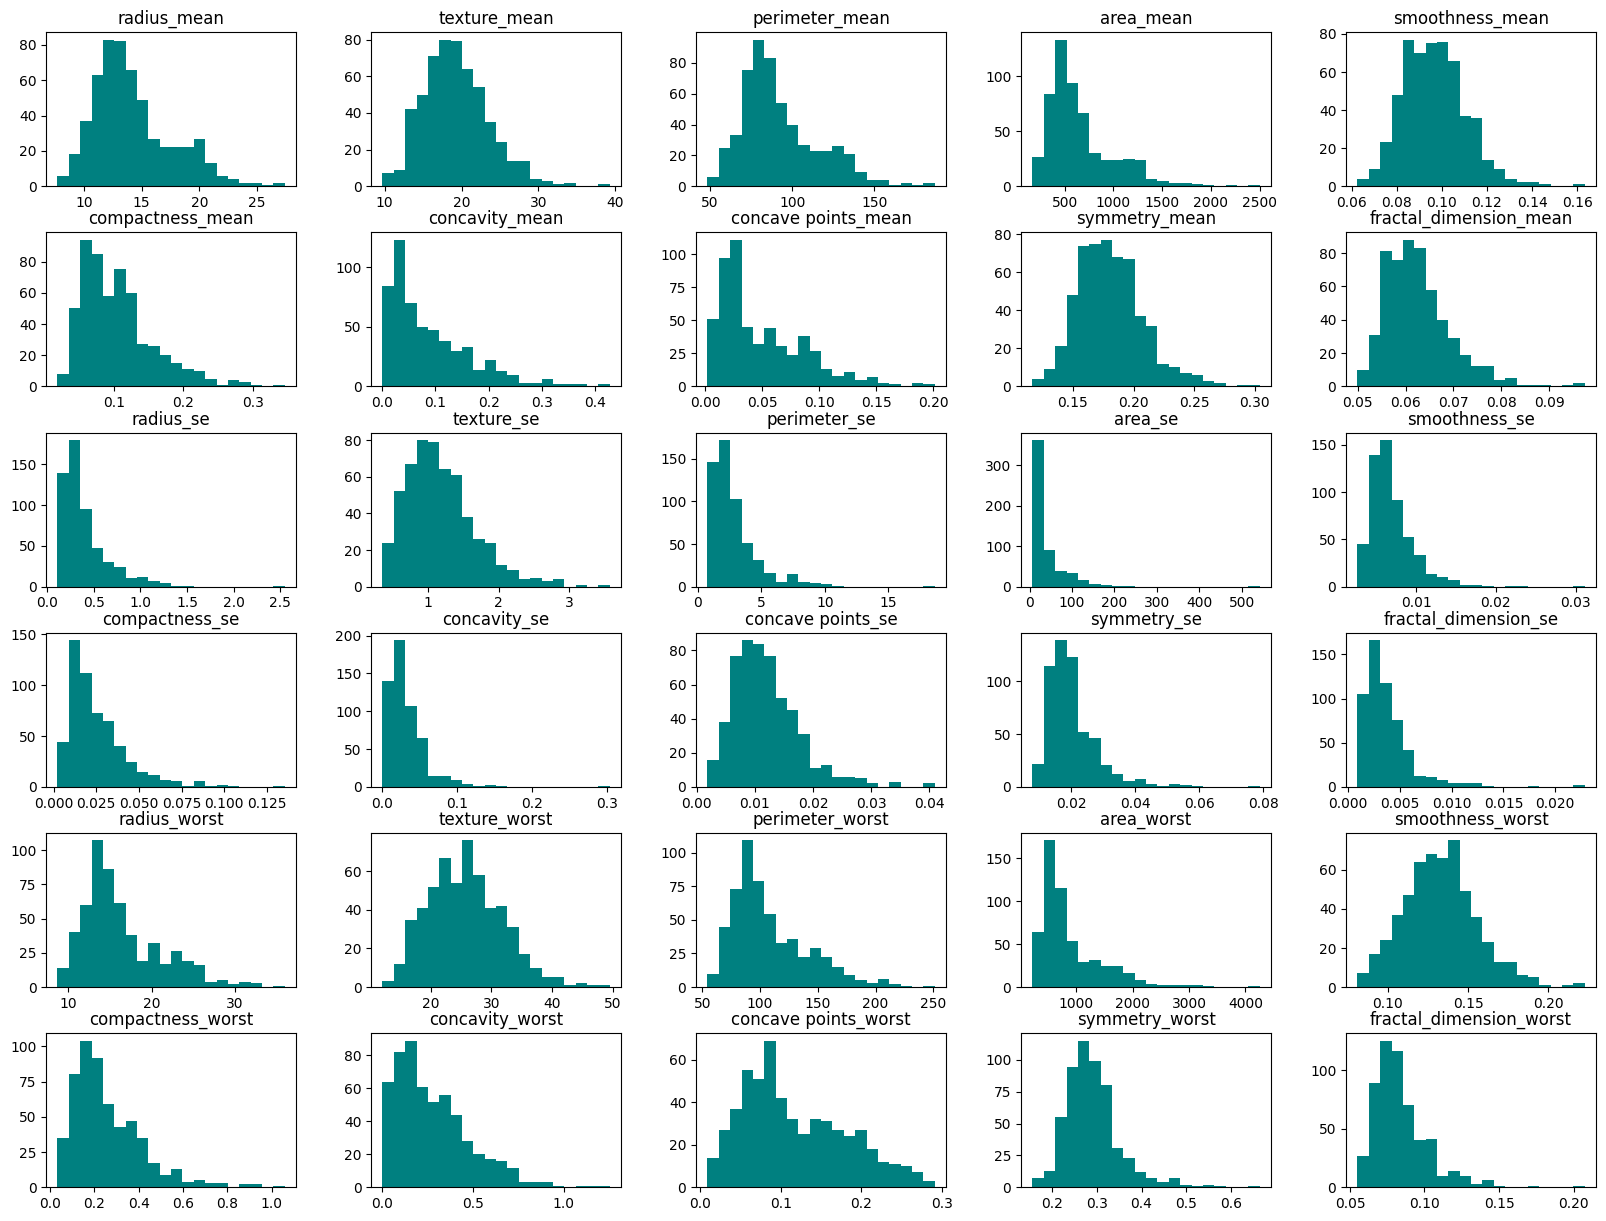

In [165]:
df.iloc[:, 2:].hist(bins=20, figsize=(20, 15), grid=False, color='teal')
plt.show()

(30.5, -0.5)

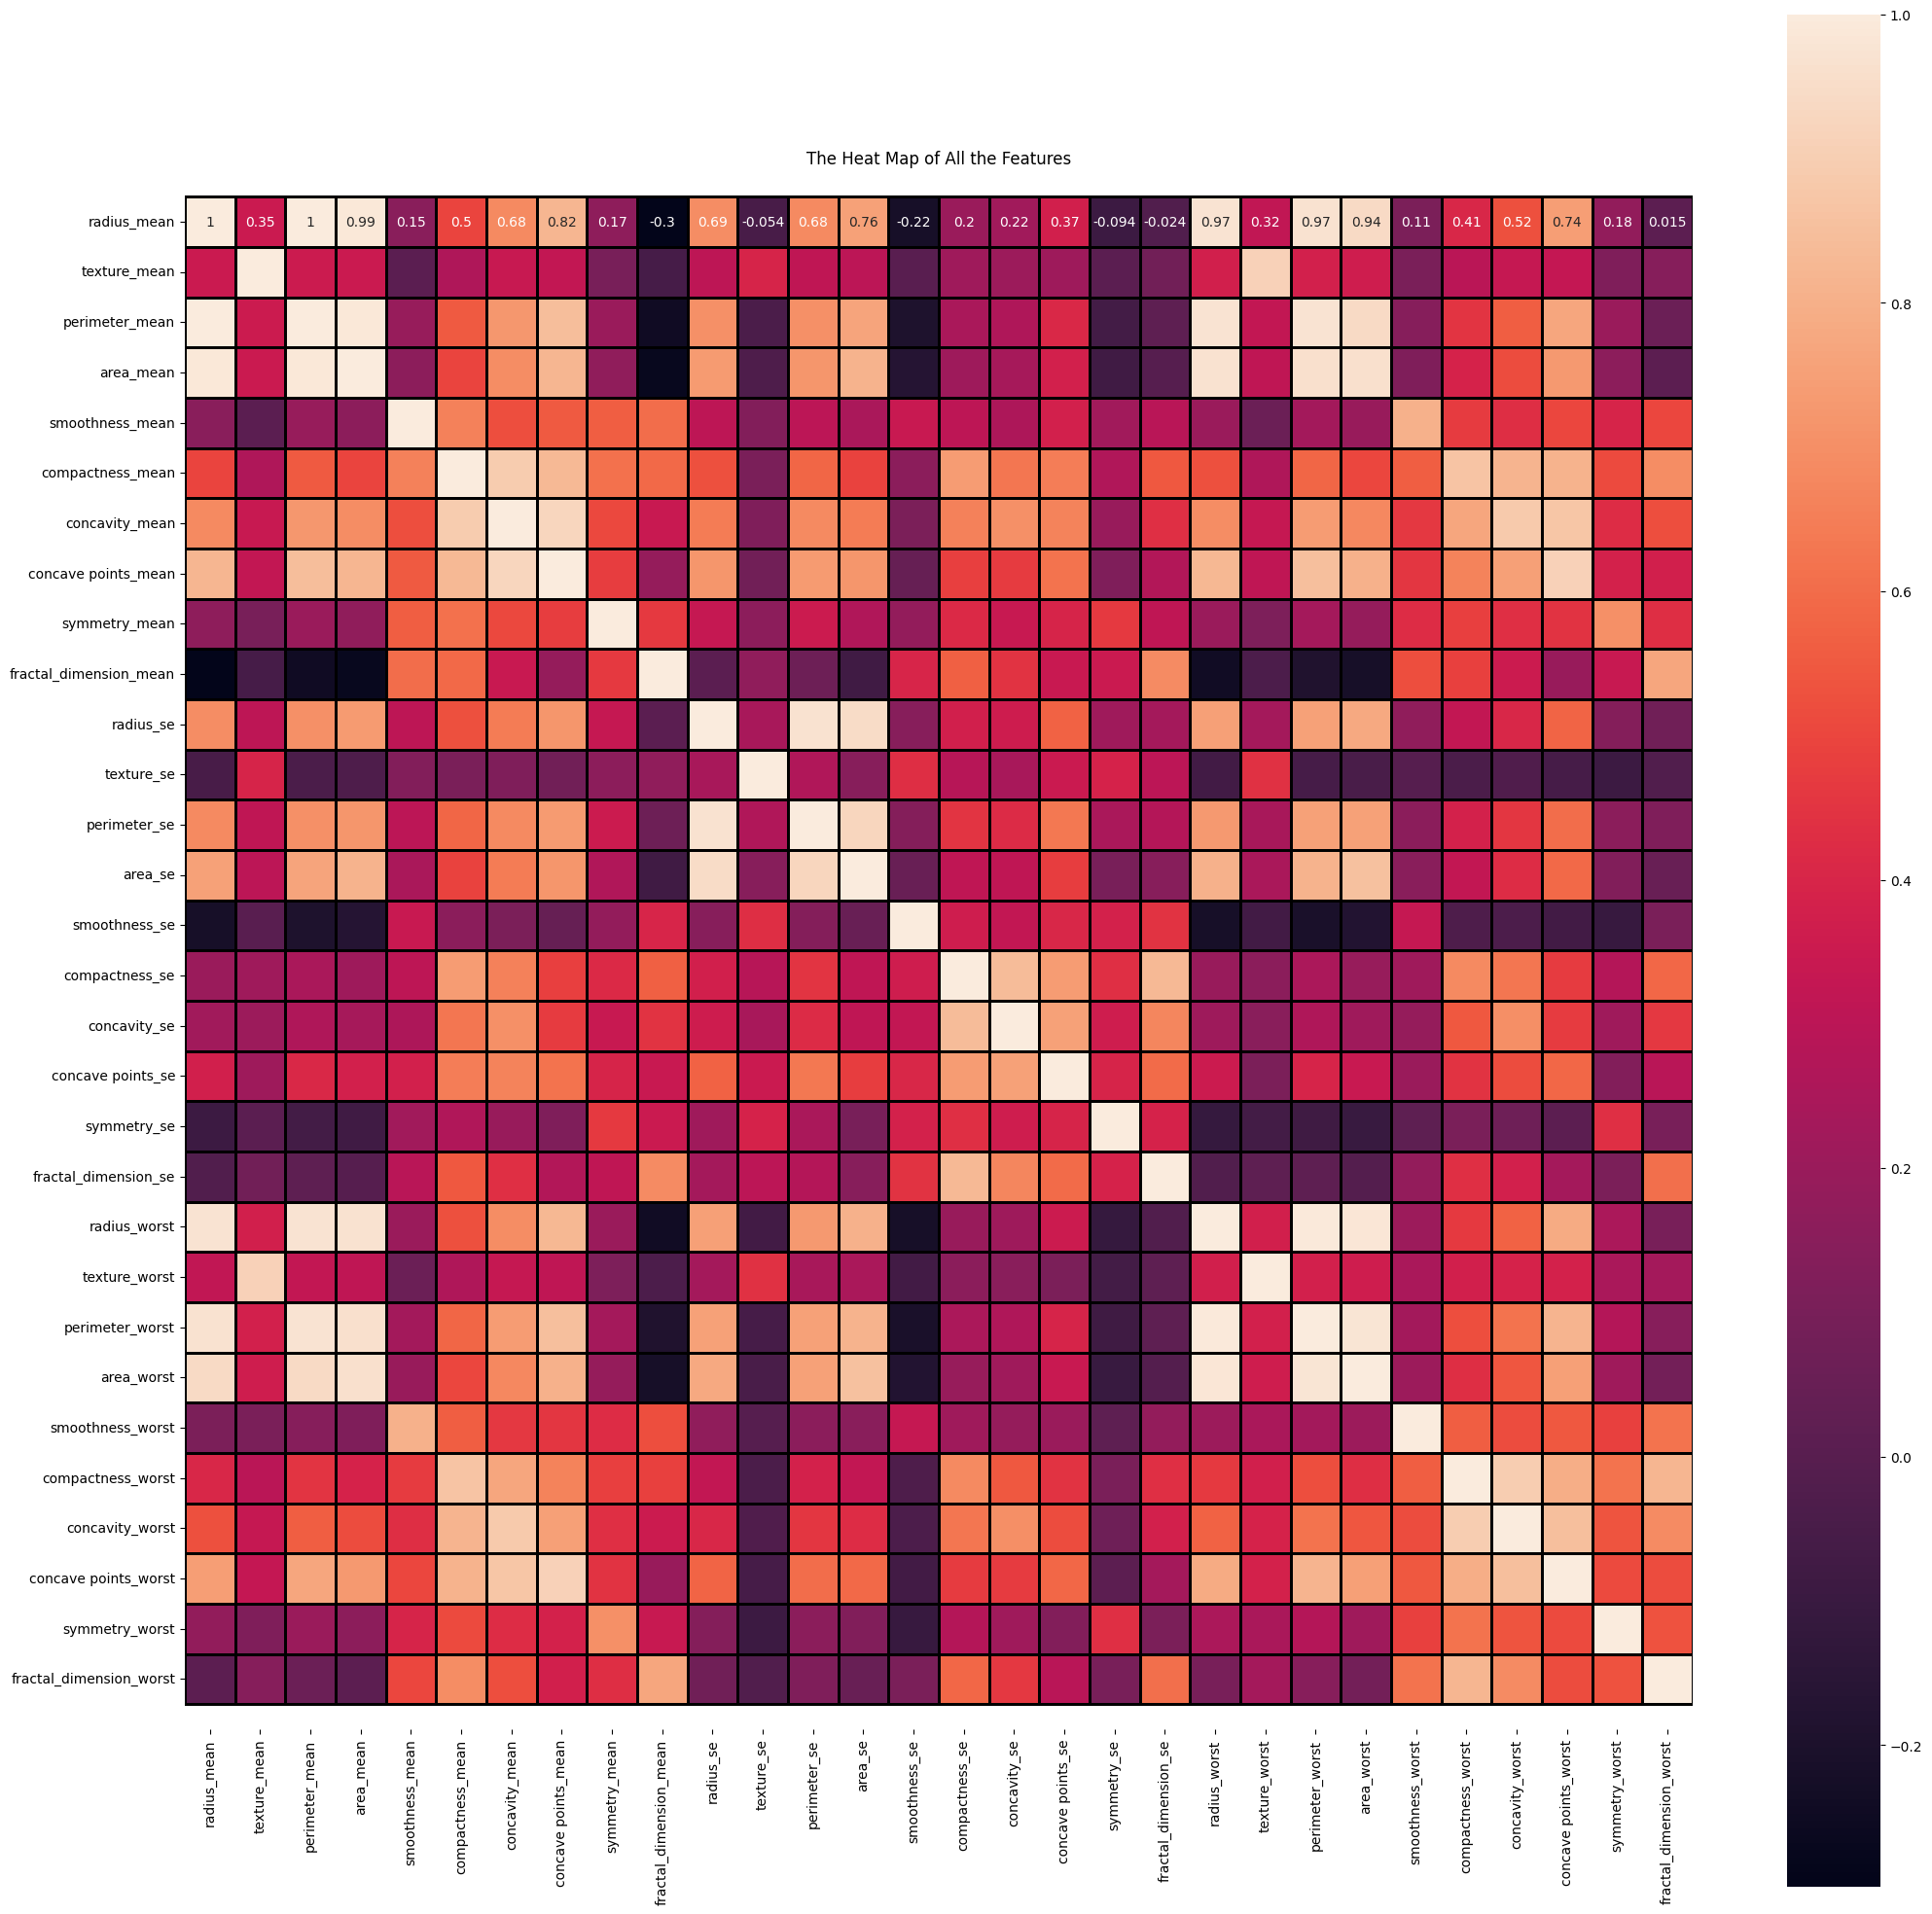

In [166]:
df_copy = df.copy(deep = True)
df_independent = df_copy.drop(['id', 'diagnosis'], axis = 1)

plt.figure(1, figsize = (25,25))
ax = sns.heatmap(df_independent.corr(), annot = True, square = True, \
    linewidths = 1, linecolor = 'black')

ax.set_title('The Heat Map of All the Features')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

---

Comparsion between Malignant cases vs Benign

---

In [167]:
df_independent.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 1.08, 'Radius Comparsion among Mean, Standard Error and Worst')

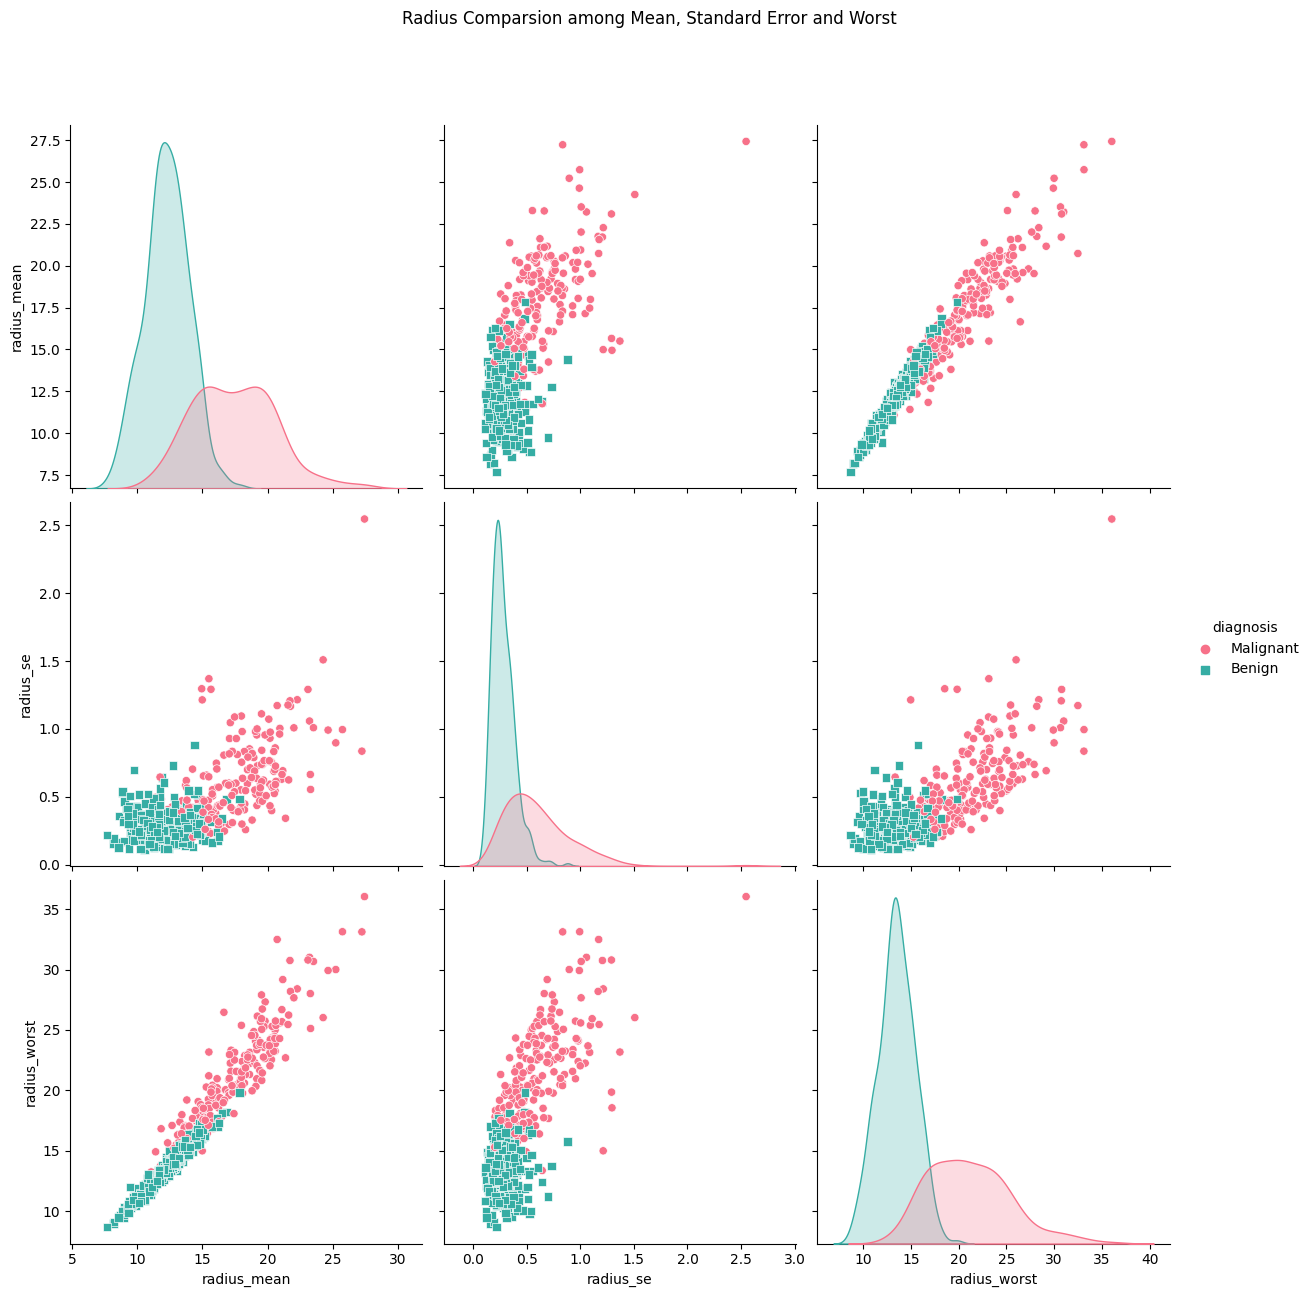

In [168]:
radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
g1 = sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

g1.fig.suptitle("Radius Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Texture Comparsion among Mean, Standard Error and Worst')

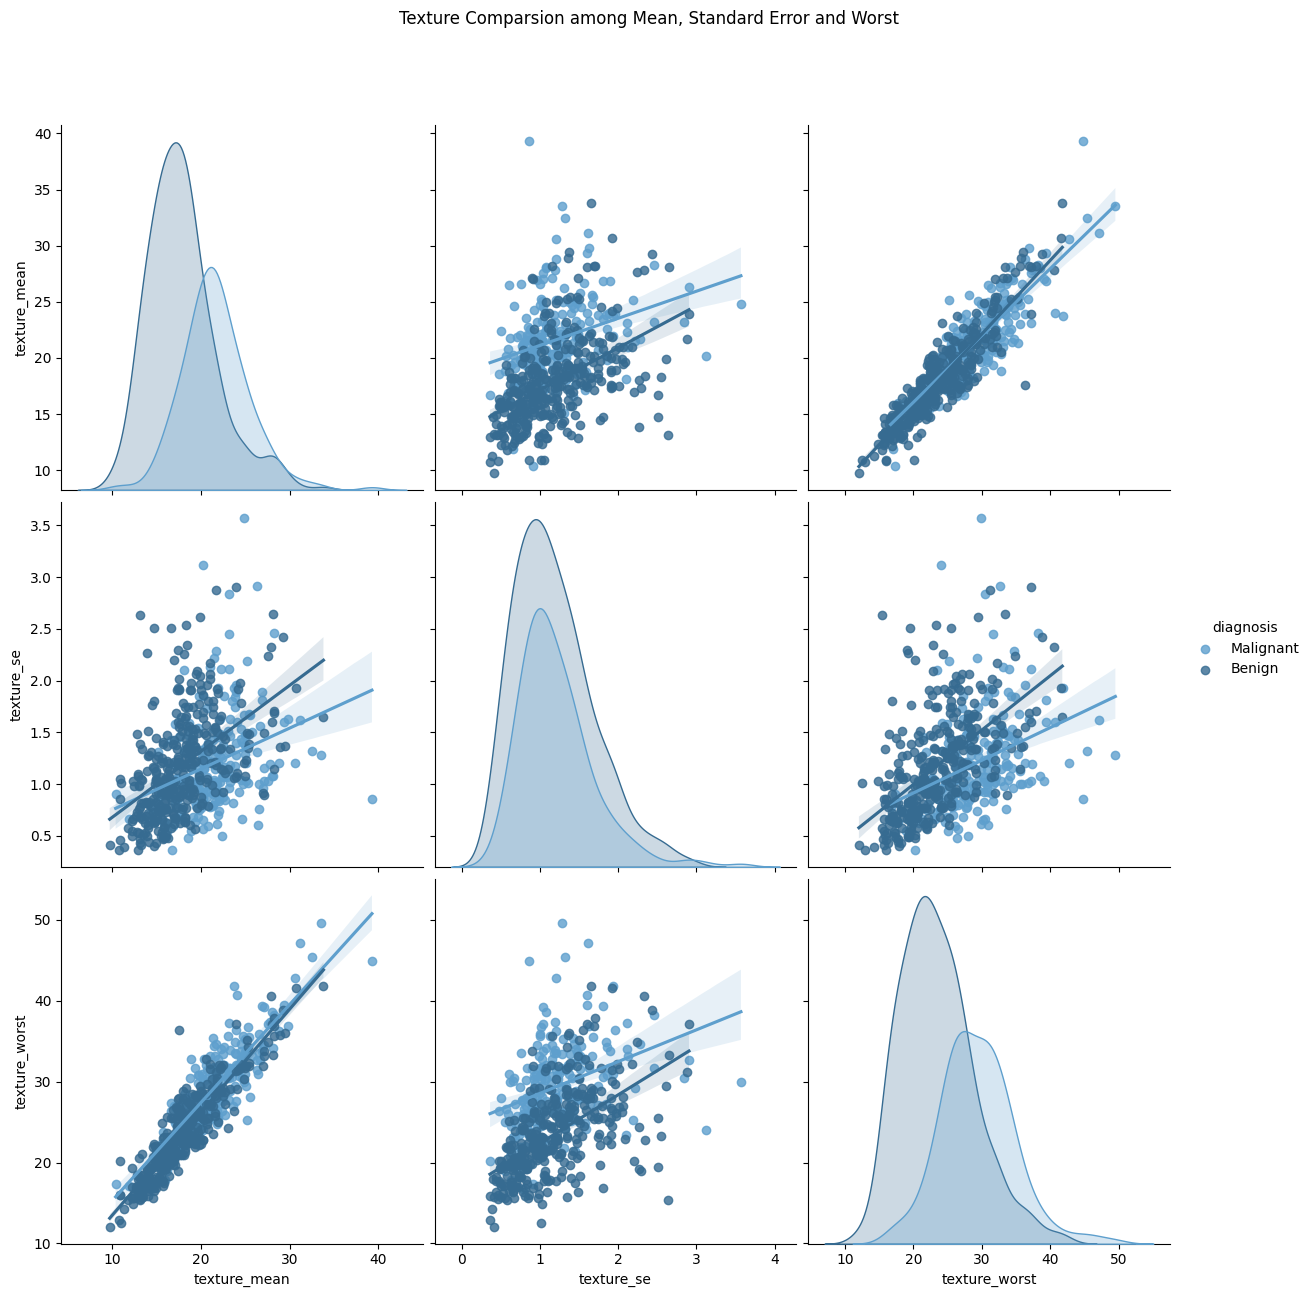

In [169]:
texture = df[['texture_mean','texture_se','texture_worst','diagnosis']]
g2 = sns.pairplot(texture, hue='diagnosis', palette="Blues_d",size=4, kind="reg")

g2.fig.suptitle("Texture Comparsion among Mean, Standard Error and Worst", y=1.08) 

Text(0.5, 1.08, 'Perimeter Comparsion among Mean, Standard Error and Worst')

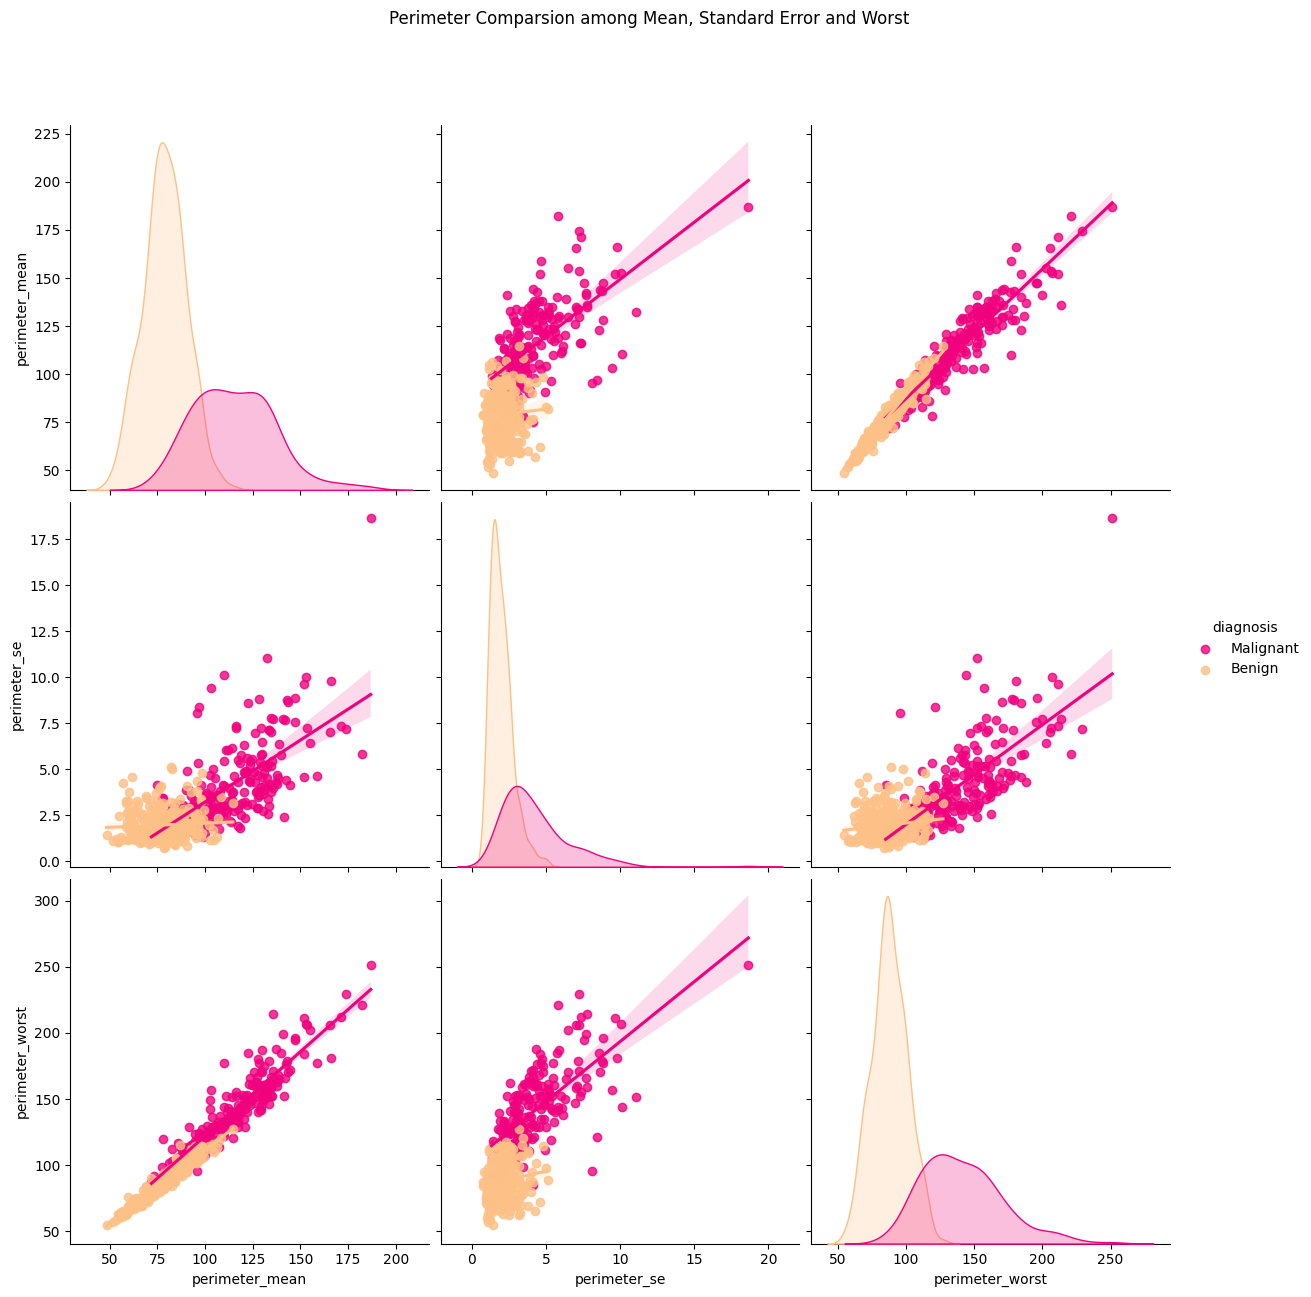

In [170]:
perimeter = df[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
g3 = sns.pairplot(perimeter, hue='diagnosis', palette='Accent_r', size = 4, kind="reg")

g3.fig.suptitle("Perimeter Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Area Comparsion among Mean, Standard Error and Worst')

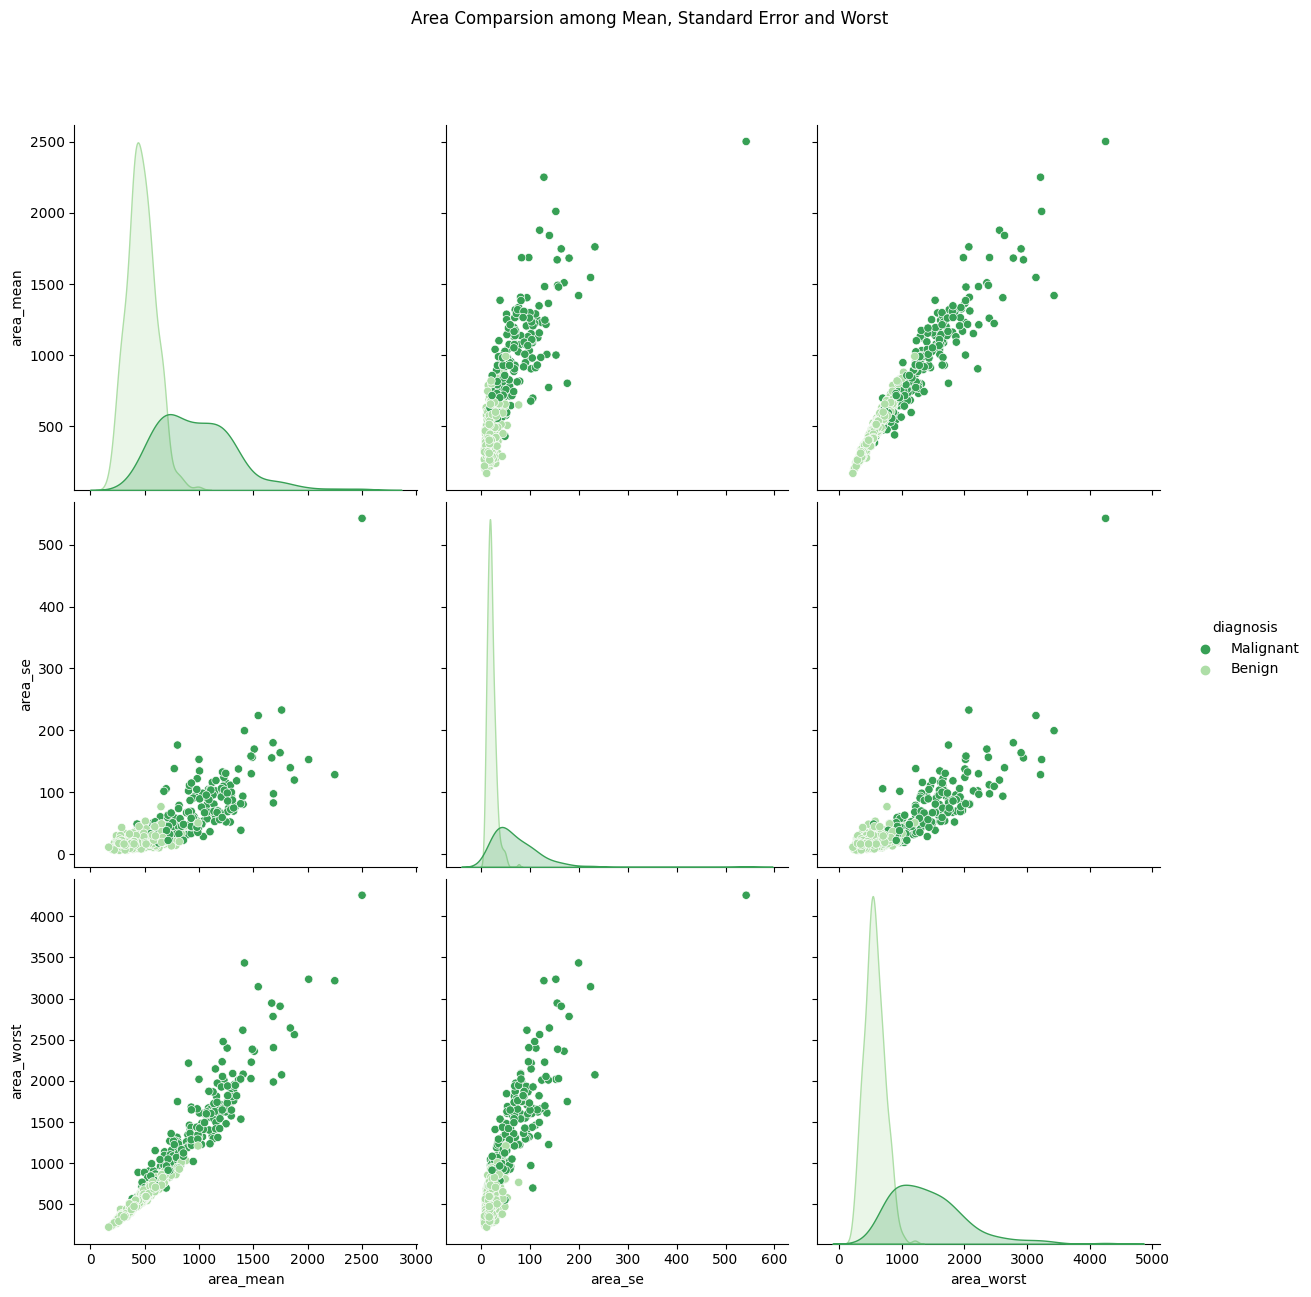

In [171]:
area = df[['area_mean','area_se','area_worst','diagnosis']]
g4 = sns.pairplot(area, hue='diagnosis',palette="Greens_r",  size =4)

g4.fig.suptitle("Area Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Smoothness Comparsion among Mean, Standard Error and Worst')

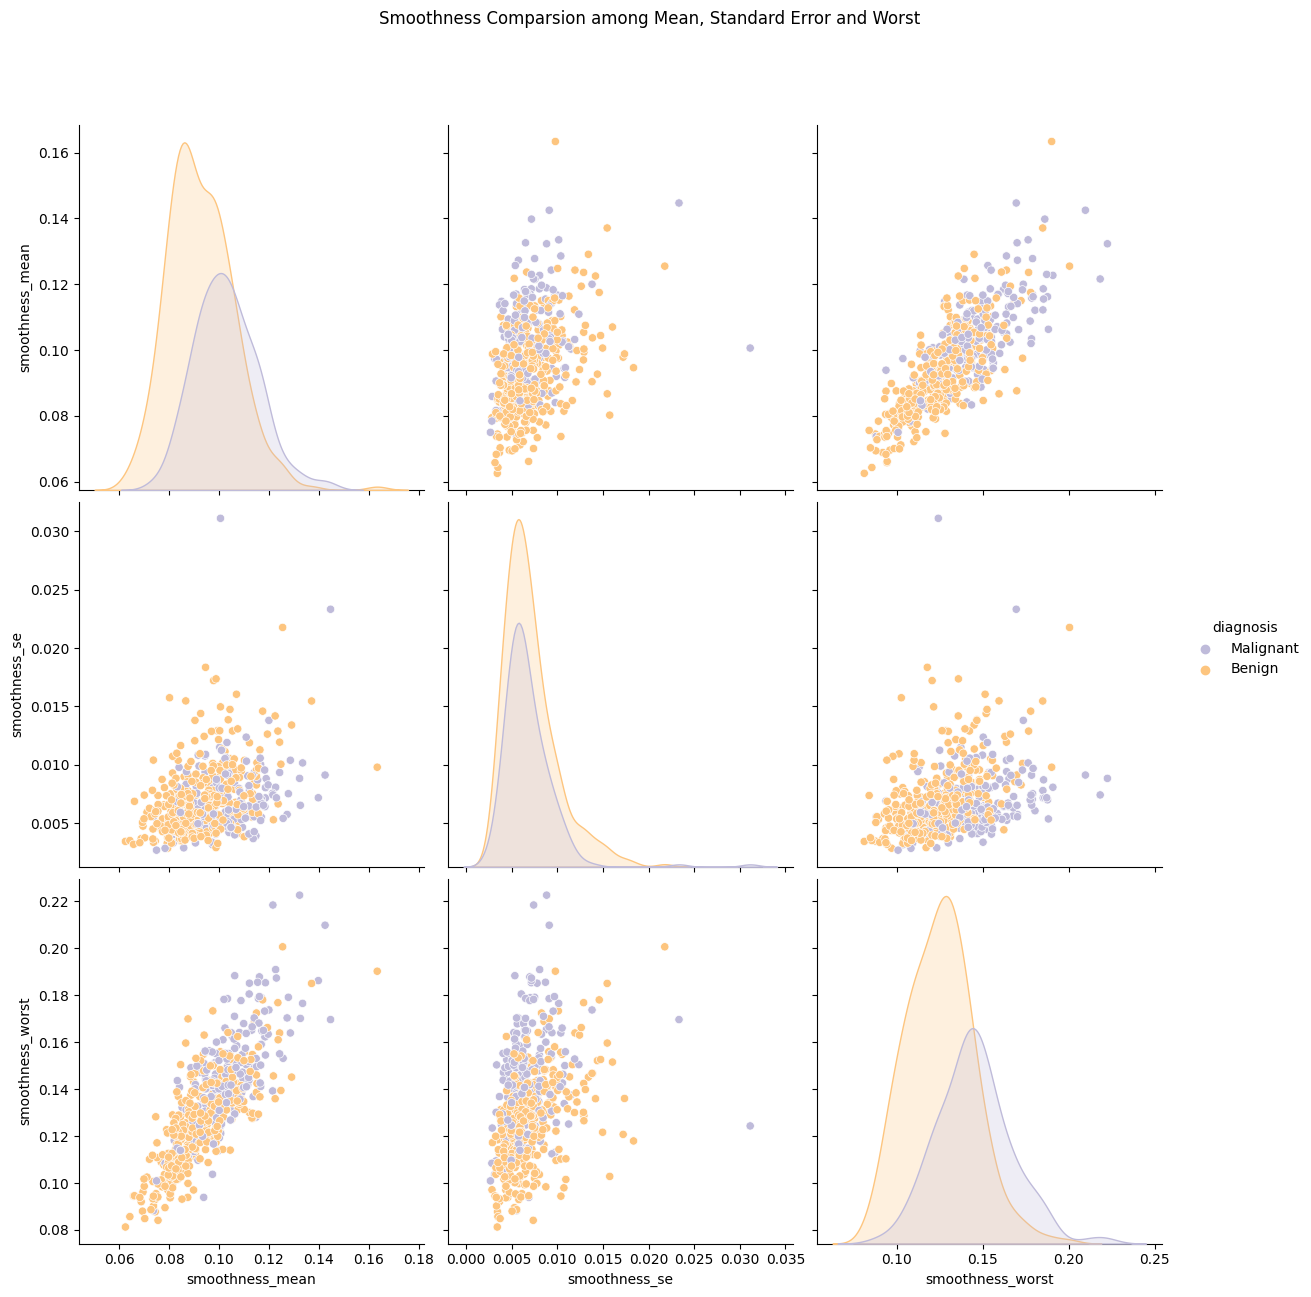

In [172]:
smoothness = df[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
g5 = sns.pairplot(smoothness, hue='diagnosis', palette = 'PuOr_r', size =4)

g5.fig.suptitle("Smoothness Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Compactness Comparsion among Mean, Standard Error and Worst')

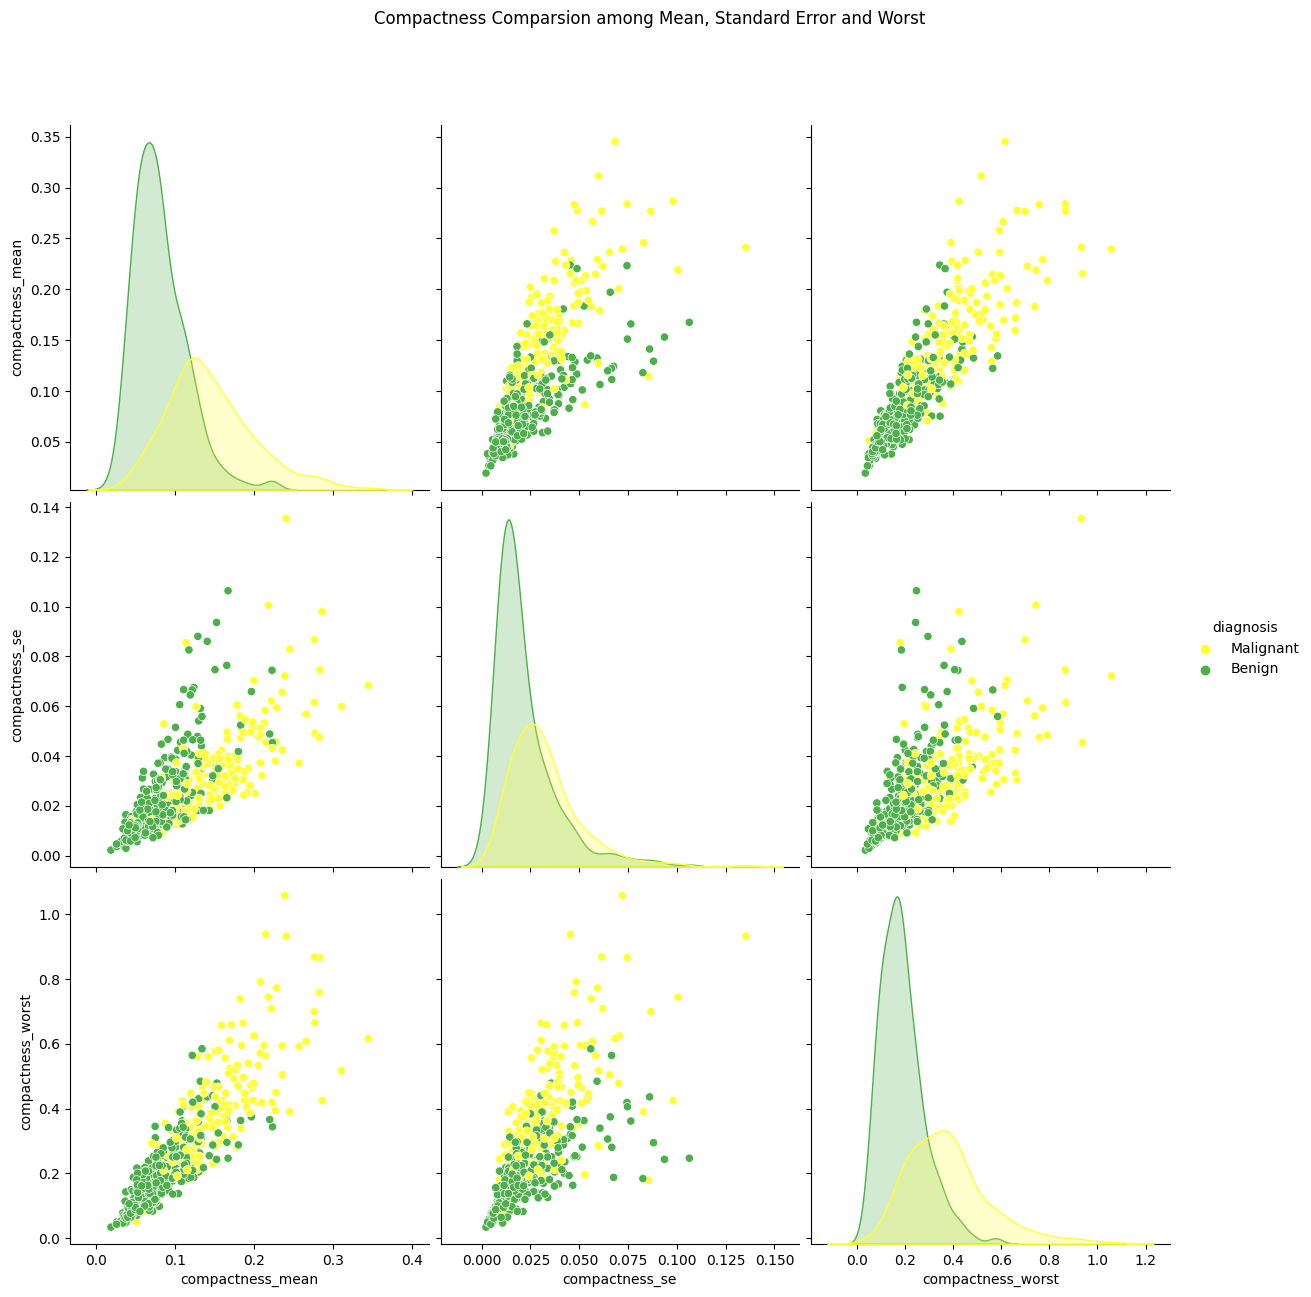

In [173]:
compactness = df[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
g6 = sns.pairplot(compactness, hue='diagnosis', palette = 'Set1_r', size = 4)

g6.fig.suptitle("Compactness Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Concavity Comparsion among Mean, Standard Error and Worst')

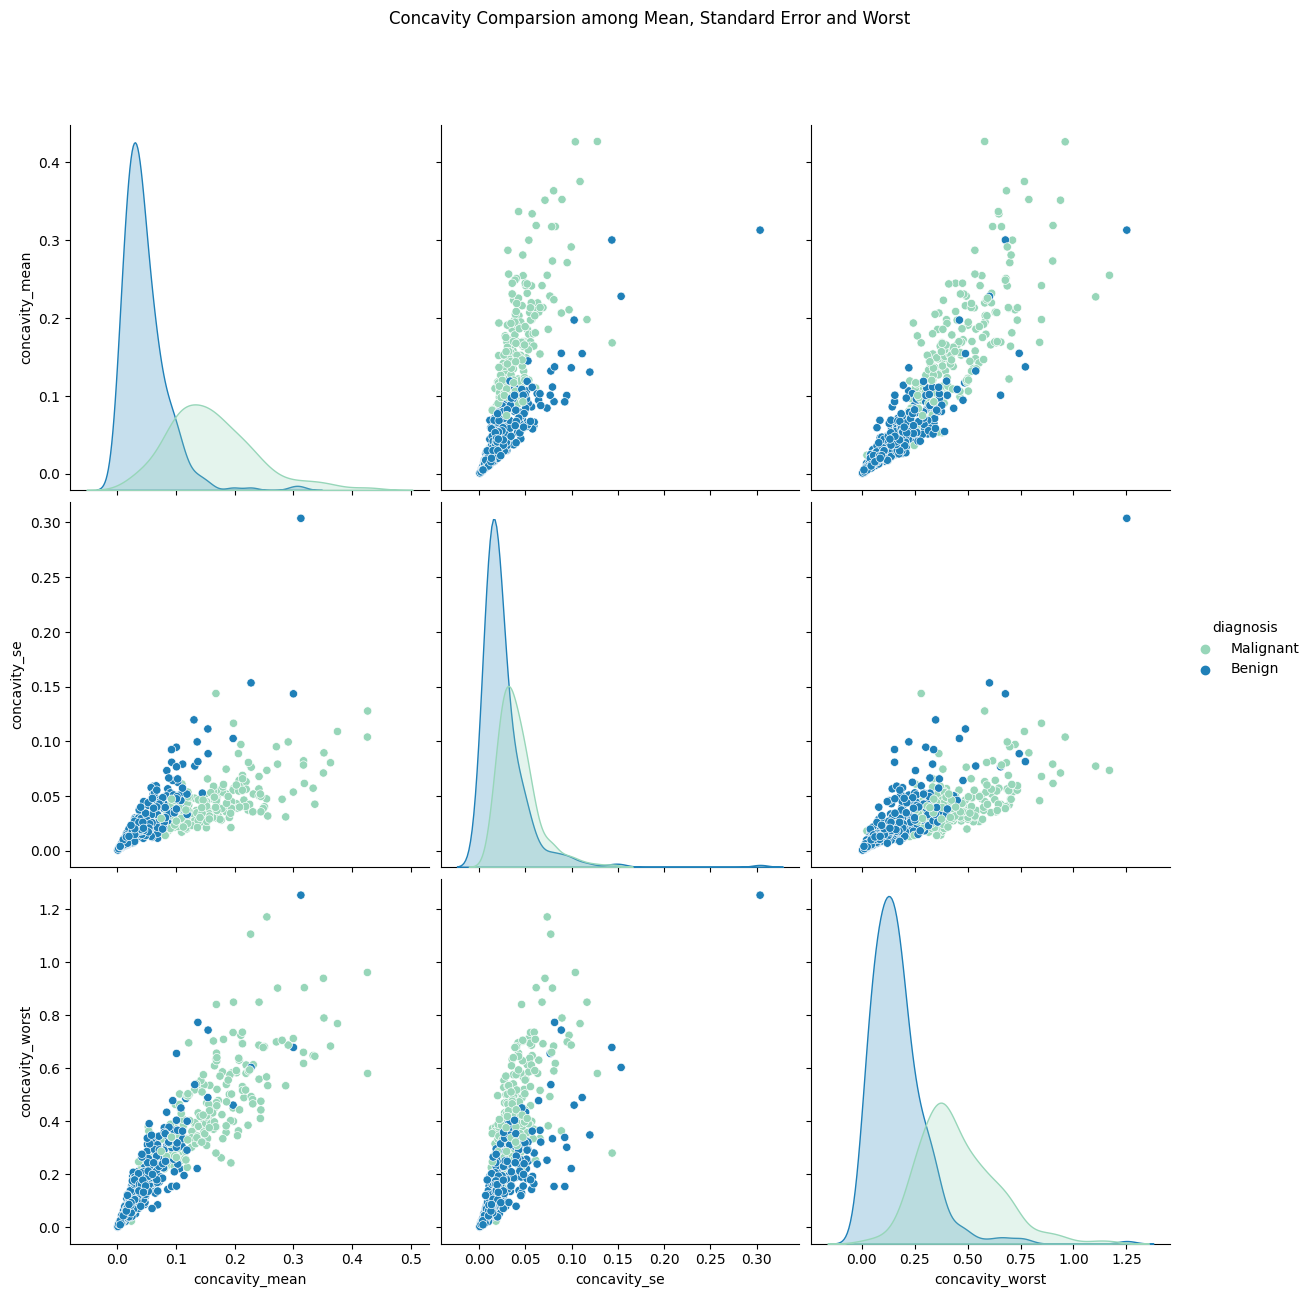

In [174]:
concavity = df[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
g7 = sns.pairplot(concavity, hue='diagnosis', palette = 'YlGnBu', size = 4)

g7.fig.suptitle("Concavity Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Concave Points Comparsion among Mean, Standard Error and Worst')

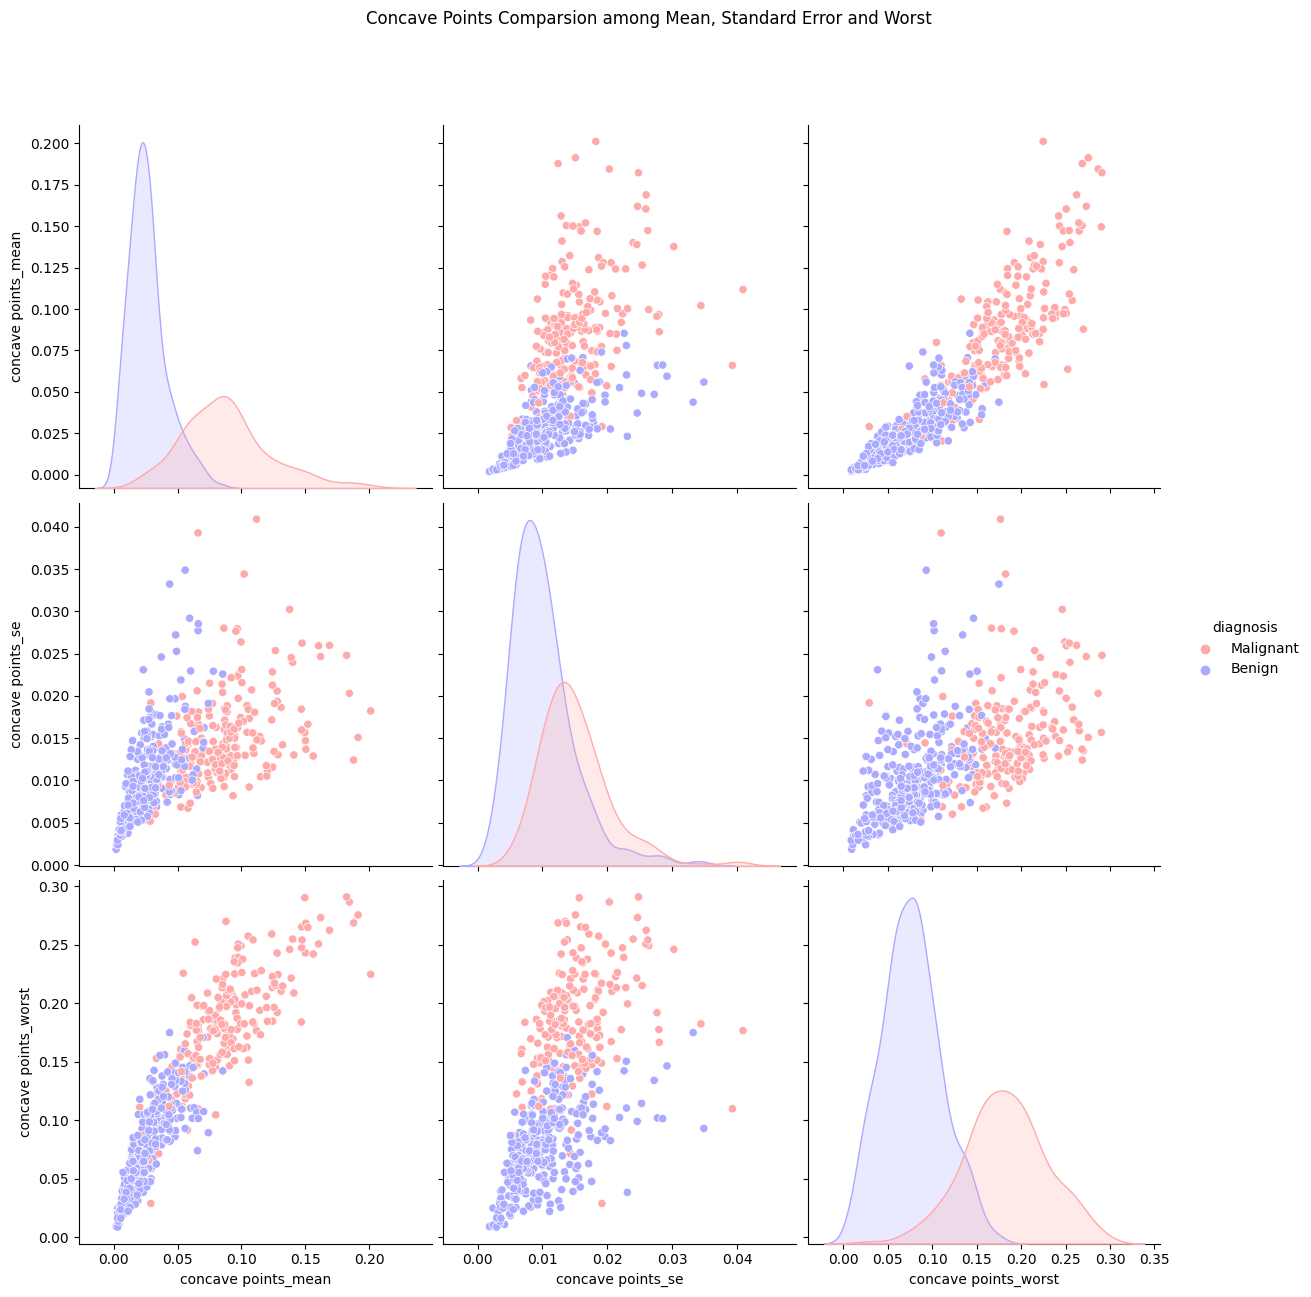

In [175]:
concave_points = df[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
g8 = sns.pairplot(concave_points, hue='diagnosis', palette = 'bwr_r', size = 4)

g8.fig.suptitle("Concave Points Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Symmetry Comparsion among Mean, Standard Error and Worst')

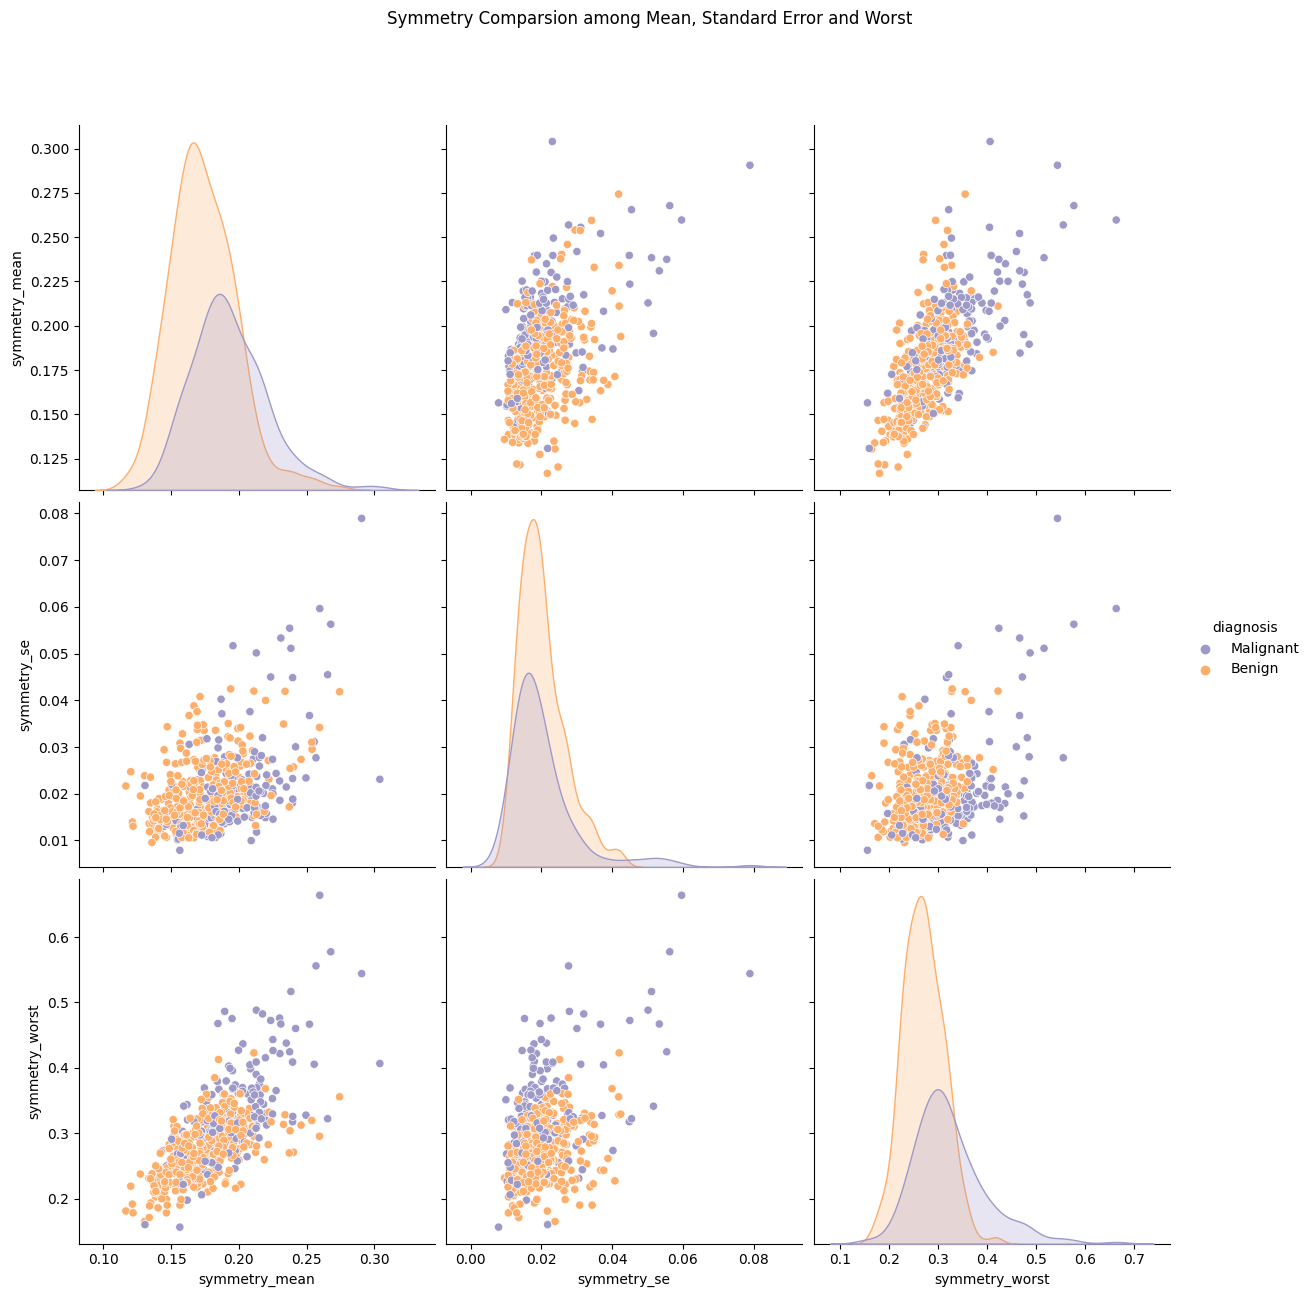

In [176]:
symmetry = df[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
g9 = sns.pairplot(symmetry, hue='diagnosis', palette = 'tab20c_r', size = 4)

g9.fig.suptitle("Symmetry Comparsion among Mean, Standard Error and Worst", y=1.08)

Text(0.5, 1.08, 'Fractal Dimension Comparsion among Mean, Standard Error and Worst')

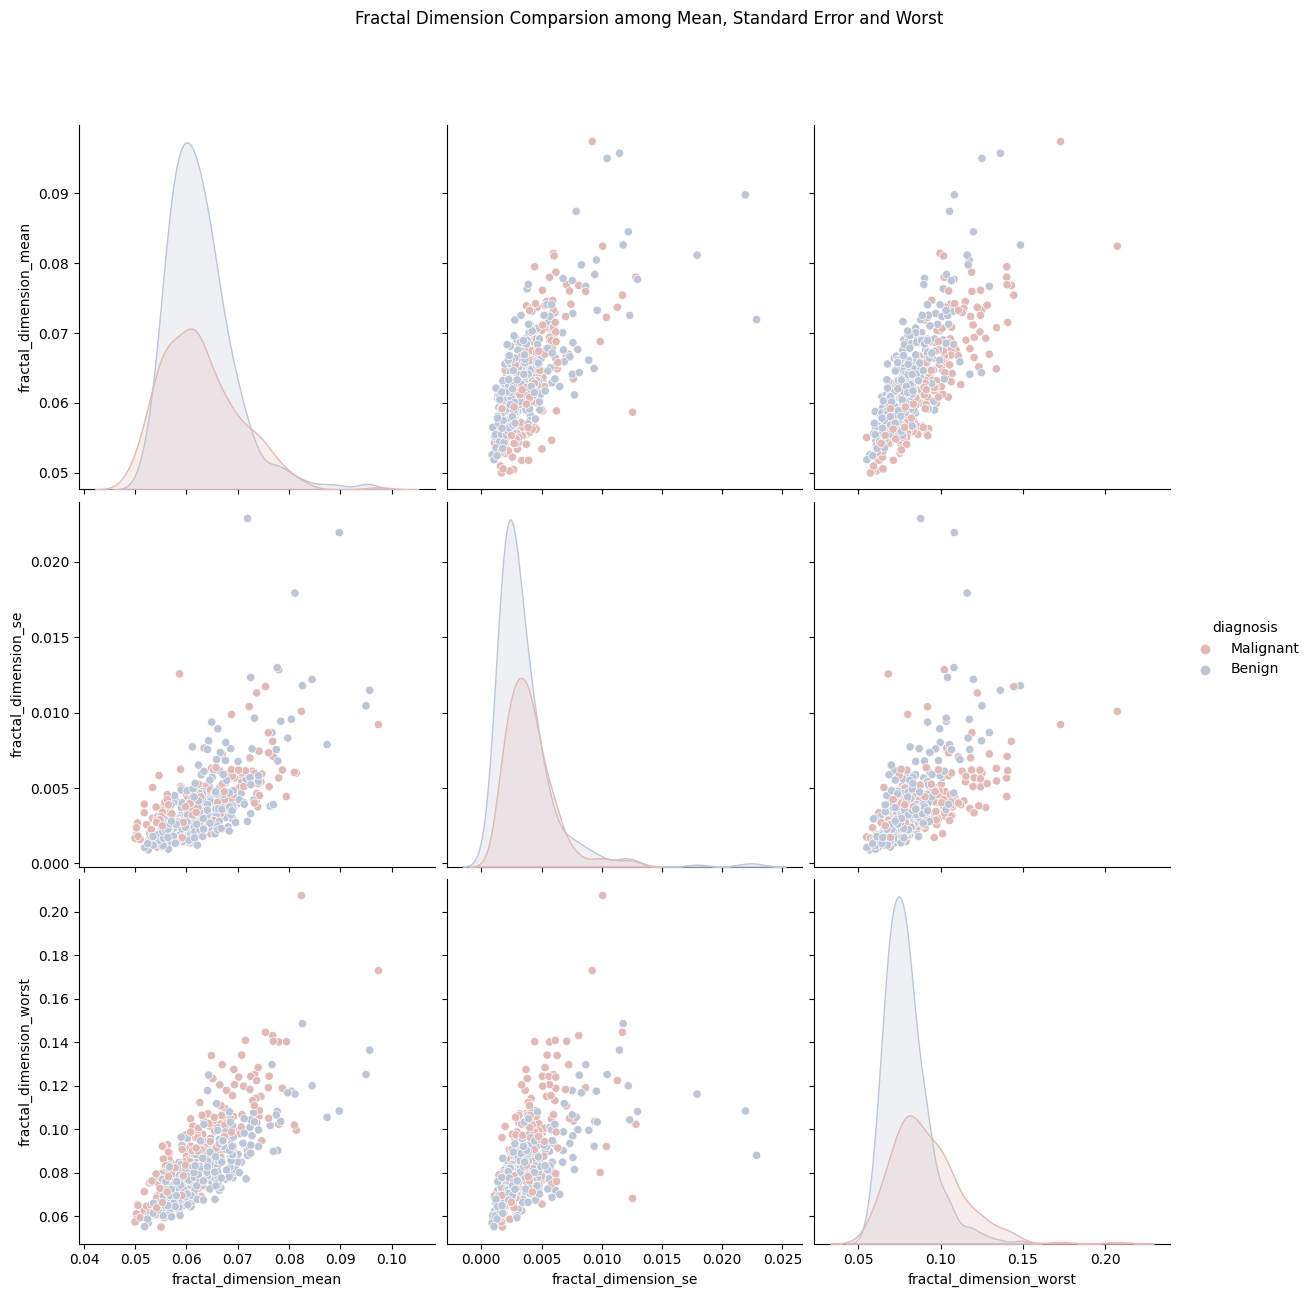

In [177]:
fractal_dimension = df[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
g10 = sns.pairplot(fractal_dimension, hue='diagnosis',  palette = 'vlag_r', size = 4)

g10.fig.suptitle("Fractal Dimension Comparsion among Mean, Standard Error and Worst", y=1.08)

---



# <center> <b> Principal Component Analysis of Malignant vs Benign Cells </b></center>


---

<br/>

$ X $ is an m x n matrix from the original datatset, where m = samples and n = features  \
$ x_{ij} \in X \hspace{1cm} x_{ij} \in \mathbb{R}  $ 

#### 1) Scaling and Centering the Data (via z-score)

$ z_{ij} = \frac{x_{ij} - \bar x_{j}}{\sigma_{j}} $ \
$ z_{ij} \in Z_{m \hspace{0.1cm} \text{x} \hspace{0.1cm} n} $

#### 2) Compute Principal Components via Singular Value Decomposition
$ Z = U \Sigma V^T $ \
The $m^{th}$ principal components, $P_{m}$ are computed by, \
$ P_{m} = U \Sigma $

In [178]:
df_copy = df.copy(deep = True)
df_copy1 = df_copy.drop(["id", "diagnosis"], axis = 1).reset_index(drop = True)

# Scaling and Centering the Data (via z-score)
Aij = df_copy1
Aij_std = list(Aij.std())
colMeans = list(Aij.mean())
Amn = pd.DataFrame(np.zeros((len(Aij), len(colMeans))))
for j in range(len(colMeans)):
    for i in range(len(Aij)):
        Amn.iloc[i,j] = (Aij.iloc[i,j] - colMeans[j]) / Aij_std[j]

# PCA via Singular Value Decomposition
svd = np.linalg.svd(Amn, full_matrices=True, compute_uv=True, hermitian=False)
U = svd[0].T
PC1 = pd.Series(U[0] * (svd[1][0]))
PC2 = pd.Series(U[1] * (svd[1][1]))
finalDf = pd.concat([PC1, PC2, df['diagnosis'].reset_index(drop=True)], axis = 1)
finalDf.columns = ["PC1", "PC2", "diagnosis"]

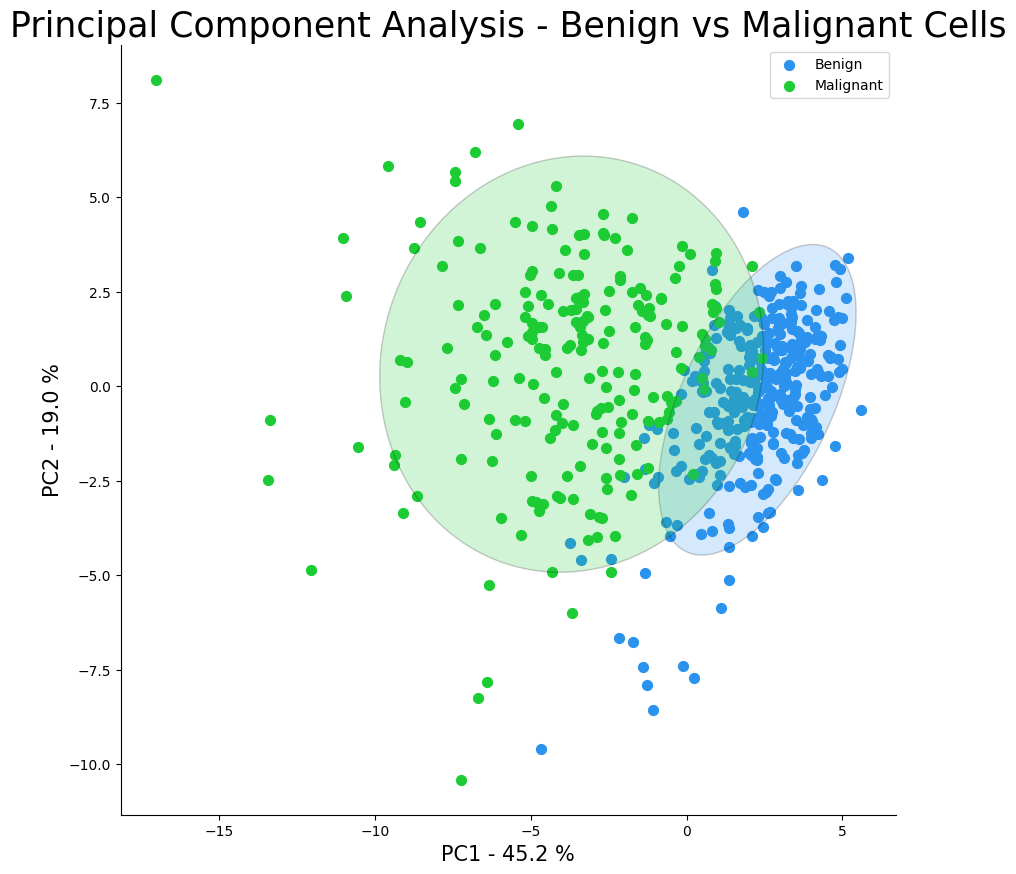

In [179]:
# Visualization of the PCA plot


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 

# Projecting the points from PC1 and PC2
targets = ["Benign", "Malignant"]
colors = ['#2b93ed', '#1dcc34']
for target, color in zip(targets,colors):
    ax.scatter(x = finalDf.loc[finalDf['diagnosis'] == target, 'PC1'], 
               y = finalDf.loc[finalDf['diagnosis'] == target, 'PC2'], 
               c = color, s = 50)
    
# Computation of 95% confidence statistical ellipse   
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
    
for lab, col in zip(targets, colors):
    x_PC1 = finalDf[finalDf["diagnosis"]==lab]["PC1"]
    y_PC2 = finalDf[finalDf["diagnosis"]==lab]["PC2"]

        # computing the shape of the ellipse
    vals, vecs = eigsorted(np.cov(x_PC1, y_PC2))
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 4*np.sqrt(vals)

        # create the ellipse
    ell = Ellipse(xy=(np.mean(x_PC1), np.mean(y_PC2)),width=w, height=h, angle=theta, color='black', alpha=0.2)
    ell.set_facecolor(col)
    ax.add_artist(ell)

# Graphics of the plot
ax.legend(targets)
ax.set_xlabel('PC1 - %.1f %%' % (100*svd[1][0]**2 / sum(svd[1]**2)), fontsize = 15)
ax.set_ylabel('PC2 - %.1f %%' % (100*svd[1][1]**2 / sum(svd[1]**2)), fontsize = 15)
ax.set_title('Principal Component Analysis - Benign vs Malignant Cells', fontsize = 25)
ax.grid(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

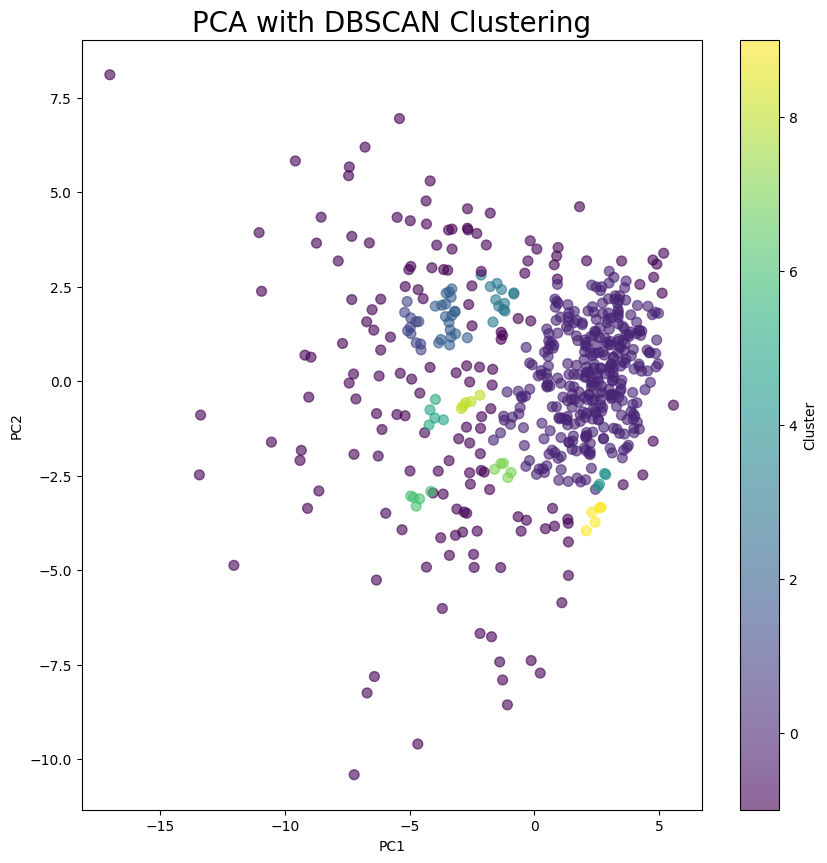

In [180]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
finalDf['Cluster'] = dbscan.fit_predict(finalDf[['PC1', 'PC2']])

# Visualization of PCA with DBSCAN Clustering
fig, ax = plt.subplots(figsize=(10, 10))

# Plot DBSCAN Clusters
scatter = ax.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label="Cluster")

# Add Titles and Labels
ax.set_title('PCA with DBSCAN Clustering', fontsize=20)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

---



# <center> <b> Pre-defined Functions </b></center>


---

<br/>

In [181]:
def model_selected(model_name):
  if model_name == 'RandomForestClassifier':
    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  elif model_name == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  elif model_name == 'SVC':
    model = SVC(kernel = 'linear', random_state = 0)
  else:
    print("Invalid Model Name!! Please give a proper model name!")
  return model

In [182]:
def best_model():
  max_accuracy = max(Accuracy.values())
  max_accuracy_model_name = max(Accuracy, key=Accuracy.get)
  print(max_accuracy_model_name +" model is giving highest accuracy : " + max_accuracy )

---



# <center> <b> Data Preparation </b></center>



---

<br/>

In [183]:
#After encoding
df.to_csv("Cleaned_Output_encoding.csv")

In [184]:
#Transforming the Categorical features 

label = LabelEncoder()

df['diagnosis'] = label.fit_transform(df['diagnosis'])


In [185]:
df1 = df.copy(deep = True)
x = df1.drop(['id', 'diagnosis'], axis = 1)
# Print the count value: 

# print(df.info)
y = df[['diagnosis']]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 443 Training Data
There are 111 Testing Data


---



# <center> <b> Feature Importance </b></center>



---

<br/>

In [186]:
#Function defined to calculate feature importance for each model
def feature_imp(model_name, X_train):    

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  print('\033[1m')
  print(f"Plotting the Feature Importance Graph for the {model_name} :")
  print('\033[0m')
  figure(figsize=(15, 10), dpi=80)

  feat_imp_sort = model.feature_importances_.argsort()
  X_axis = X_train.columns[feat_imp_sort]
  Y_axis = model.feature_importances_[feat_imp_sort]
  X_axis = X_axis[-20:]
  Y_axis = Y_axis[-20:]
  plt.barh(X_axis, Y_axis, color='hotpink')
  plt.title("Feature Importance - Top 20 Features", fontweight='bold')
  plt.grid(False)
  plt.show()

---


<center> <b> For feature importance, we will be using three classifier models. </b></center>
1. Decision Tree <br/>
2. XGBoost<br/>
3. RandomForestClassifier<br/>


---
<br/>

---



<center> <b> Decision Tree </b></center>



---

<br/>


Plotting the Feature Importance Graph for the DecisionTreeClassifier :



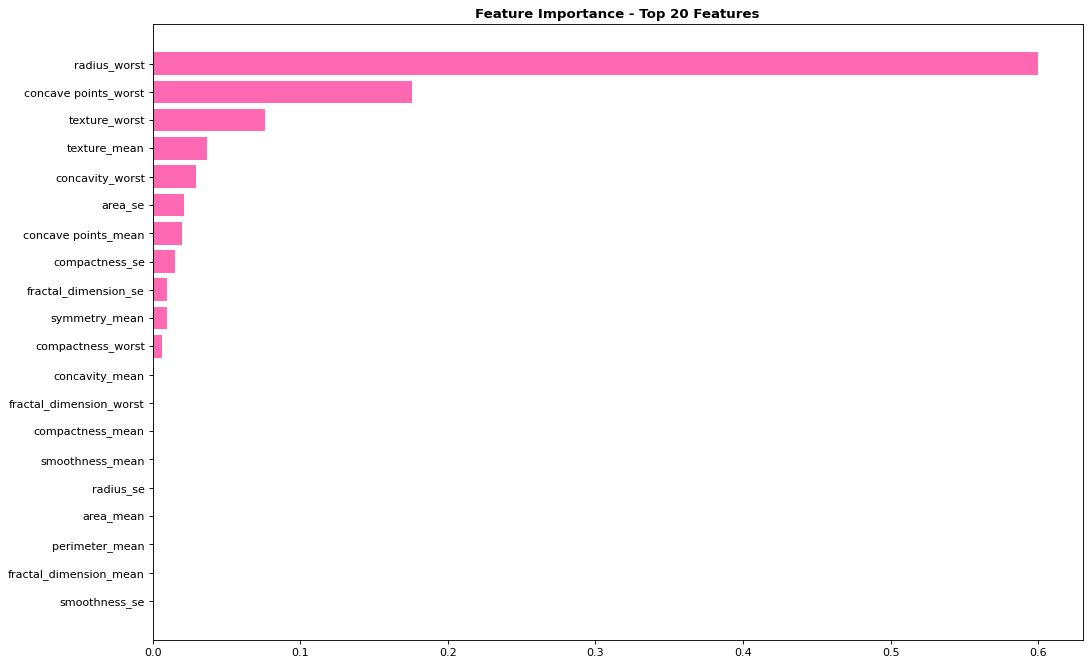

In [187]:
#Decision Tree
feature_imp('DecisionTreeClassifier',X_train)

---



<center> <b> Random Forest </b></center>



---

<br/>


Plotting the Feature Importance Graph for the RandomForestClassifier :



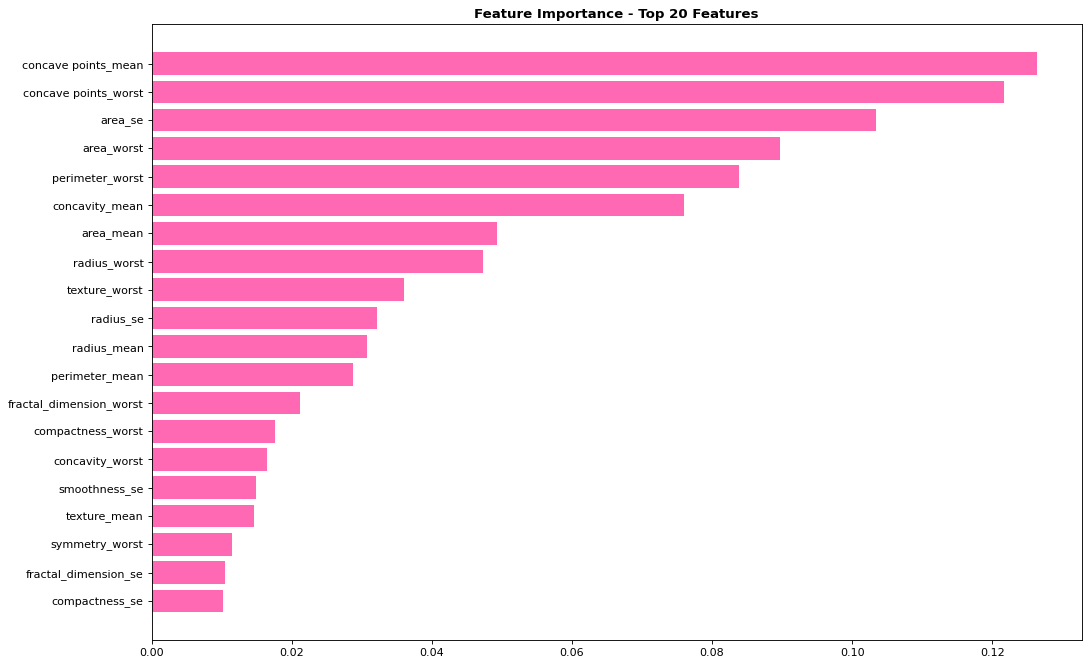

In [188]:
#Random Forest 
feature_imp('RandomForestClassifier',X_train)

---

Now, we will check for accuracy and will select some features as per the highest accuracy.


---

---



# <center> <b> Modeling </b></center>



---

<br/>

---

Model Optimization.


---

In [189]:
# Define a function for hyperparameter tuning
def hyperparameter_tuning(model_name, X_train, y_train):
    if model_name == 'DecisionTree':
        param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None]}
        model = DecisionTreeClassifier(random_state=0)
    elif model_name == 'RandomForest':
        param_grid = {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, None]}
        model = RandomForestClassifier(random_state=0)
    elif model_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        model = SVC(probability=True, random_state=0)
    else:
        print("Invalid model name.")
        return None
    
    # Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train.values.ravel())
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

In [190]:
dt_best = hyperparameter_tuning('DecisionTree', X_train, y_train)
rf_best = hyperparameter_tuning('RandomForest', X_train, y_train)
svm_best = hyperparameter_tuning('SVM', X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 5}
Best accuracy for DecisionTree: 0.9436
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Best accuracy for RandomForest: 0.9594
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best accuracy for SVM: 0.9436


---

Define the stakced model function.


---

In [208]:
def stacked_model_train(X_train, y_train, X_test, y_test):
    print("\nTraining Stacked Model...\n")
    
    # Base classifiers
    base_classifiers = [
        ('DecisionTree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
        ('RandomForest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
        ('SVC', SVC(kernel='linear', probability=True, random_state=0))
    ]
    
    # Meta-classifier: Logistic Regression
    meta_classifier = LogisticRegression()
    
    # Stacked model
    stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)
    
    # Training the stacked model
    stacking_model.fit(X_train, y_train.values.ravel())
    
    # Predict on test data
    y_pred = stacking_model.predict(X_test)
    
    # Evaluate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    
    # Print metrics
    print(f"Testing Performance Metrics for the Stacked Model:")
    print("--------------------------------------------------")
    print(f"R2 Score:                {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error:  {rmse:.2f}")
    print(f"Accuracy:                {acc:.2f}%\n")
    
    return mse, rmse, r2, acc


In [193]:
# Function for training the model

def model_train(model_name,X_train,y_train,X_test,y_test):

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  acc = (metrics.accuracy_score(y_test, pred)*100)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("                            R2: {:.2f}".format(r2))
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  print("                      Accuracy: {:.2f}".format(acc) + '%')
  plot(y_test, pred, model_name)
  Accuracy[model_name] = "{:.2f}".format(acc) + '%'

In [194]:
def plot(y_test, pred, model_name):
  #Plotting Actual Vs Pred
     Actual_Pred = pd.DataFrame({'Actual': y_test['diagnosis'], 'Predicted': pred, 'Diff' : pred - y_test['diagnosis']})
     Actual_Pred = Actual_Pred.head(25)
     round(Actual_Pred,2)

     Result = Actual_Pred[['Actual','Predicted']]
     Result = Result.reset_index(drop=True)

     Result.plot(marker='o',figsize=(20,7))
     plt.title('Actual vs Predicted', fontsize=14)
     plt.ylabel('diagnosis', fontsize=14)
     plt.grid(False)
     plt.show() 

---



<center> <b> Decision Tree </b></center>



---

<br/>


Testing Performance Metrics for the DecisionTreeClassifier :

                            R2: 0.82
      Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.21
                      Accuracy: 95.50%


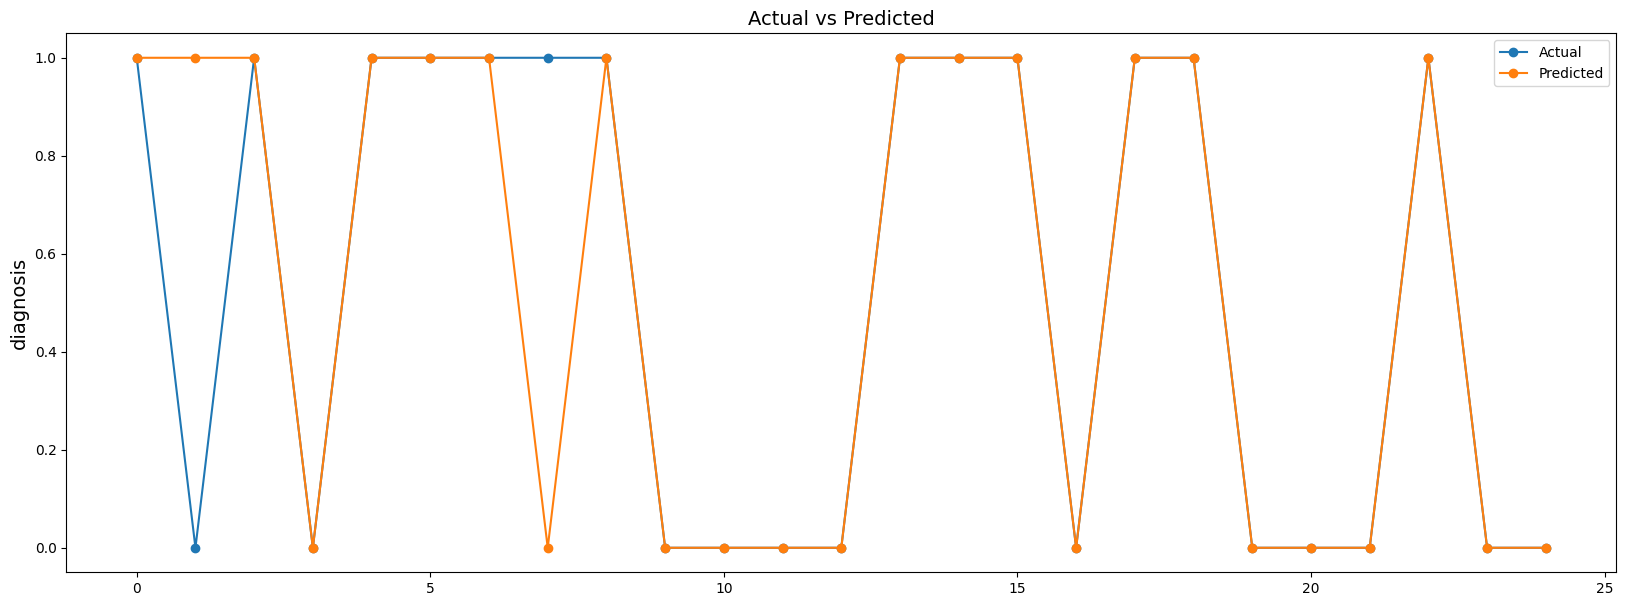

In [195]:
#Decision Tree
model_train('DecisionTreeClassifier',X_train,y_train,X_test,y_test)

---



<center> <b> Random Forest </b></center>



---

<br/>


Testing Performance Metrics for the RandomForestClassifier :

                            R2: 0.85
      Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
                      Accuracy: 96.40%


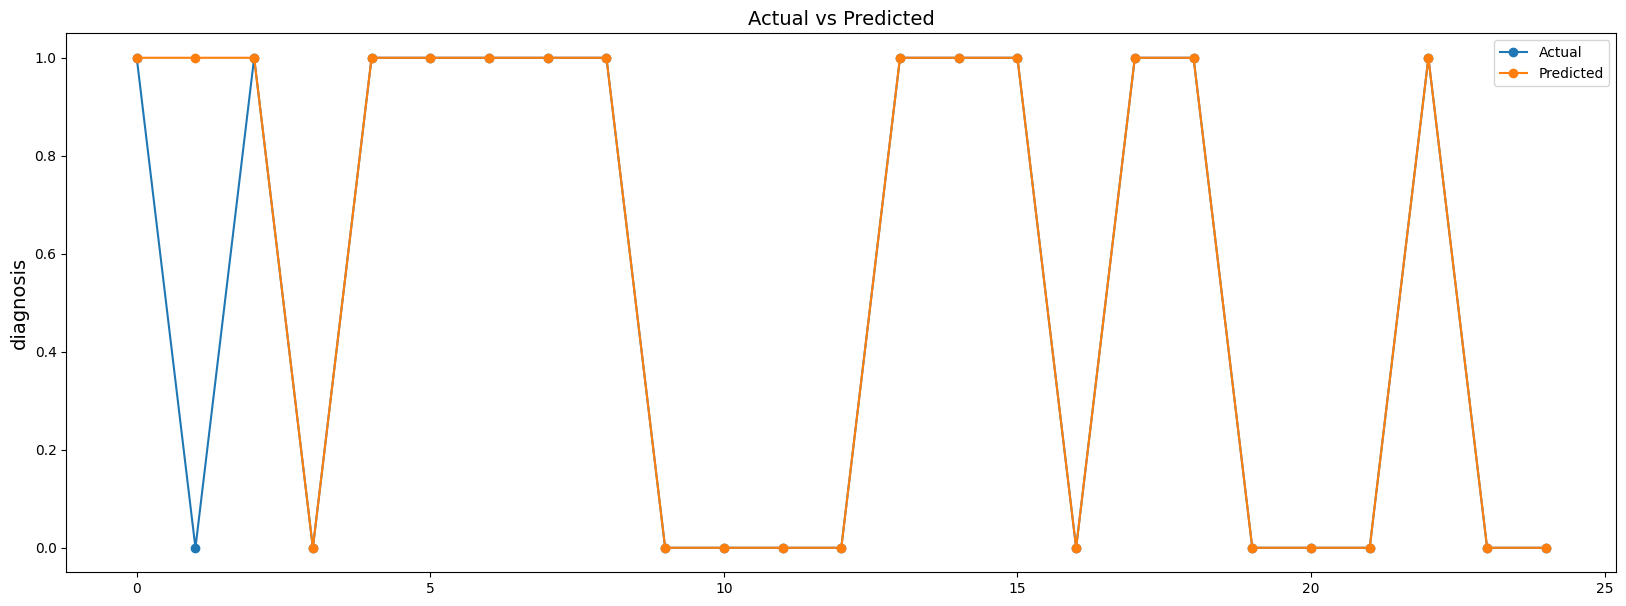

In [196]:
#Random Forest 
model_train('RandomForestClassifier',X_train,y_train,X_test,y_test)

---



<center> <b> SVM </b></center>



---

<br/>


Testing Performance Metrics for the SVC :

                            R2: 0.89
      Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
                      Accuracy: 97.30%


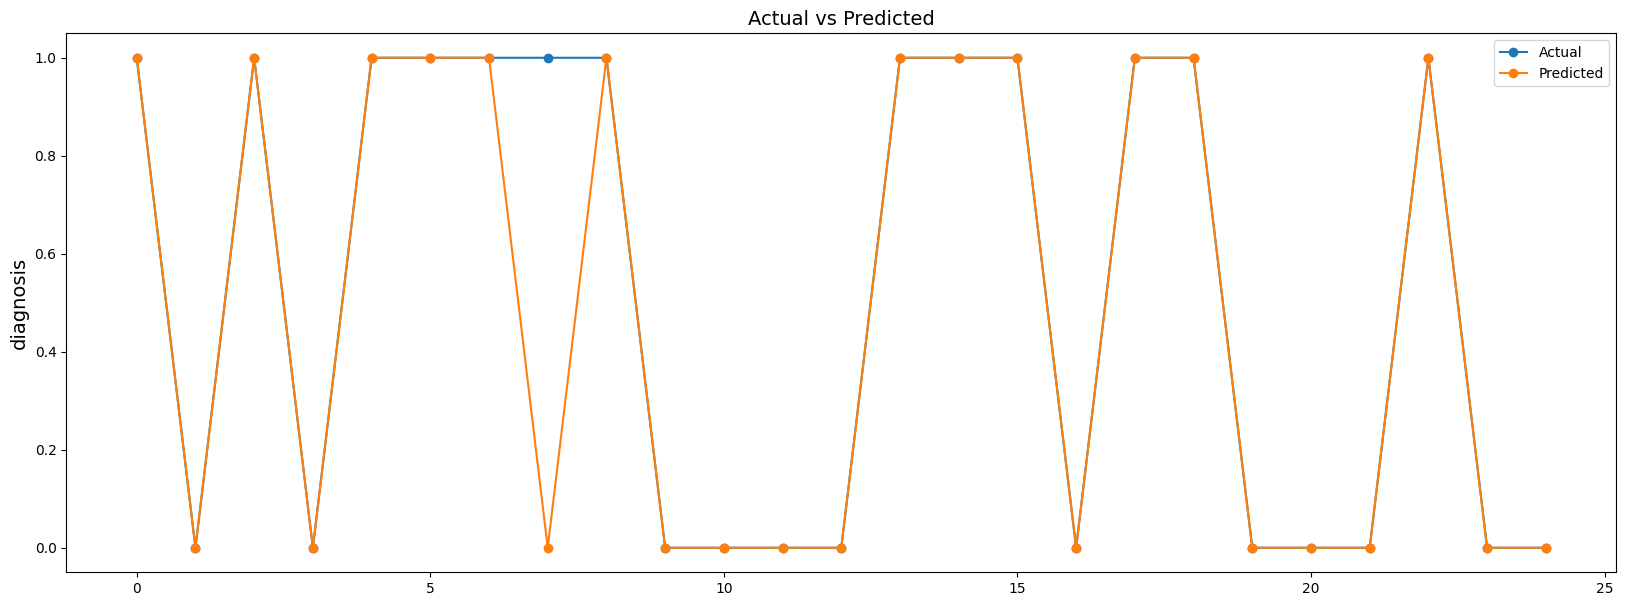

In [197]:
#SVC
model_train('SVC',X_train,y_train,X_test,y_test)

---



<center> <b> Stacked Model </b></center>



---

In [209]:
mse, rmse, r2, acc = stacked_model_train(X_train, y_train, X_test, y_test)



Training Stacked Model...

Testing Performance Metrics for the Stacked Model:
--------------------------------------------------
R2 Score:                0.89
Mean Squared Error (MSE): 0.03
Root Mean Squared Error:  0.16
Accuracy:                97.30%



---



<center> <b> Best Model Without feature selection: </b></center>



---

<br/>

In [199]:
best_model()

SVC model is giving highest accuracy : 97.30%


---



# <b> After selecting important features </b>



---

<br/>

In [200]:
dfx = df[['radius_worst', 'concave points_mean', 'concave points_worst', 'perimeter_worst', 'area_worst', 'texture_worst',
          'concavity_se', 'fractal_dimension_worst', 'compactness_worst', 'radius_se', 'concavity_worst', 'texture_mean',
          'symmetry_worst', 'area_se', 'compactness_mean', 'smoothness_se', 'smoothness_mean',
          'smoothness_worst', 'compactness_se', 'symmetry_se']]

In [201]:
x = dfx
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 443 Training Data
There are 111 Testing Data


---



<center> <b> Decision Tree </b></center>



---

<br/>


Testing Performance Metrics for the DecisionTreeClassifier :

                            R2: 0.82
      Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.21
                      Accuracy: 95.50%


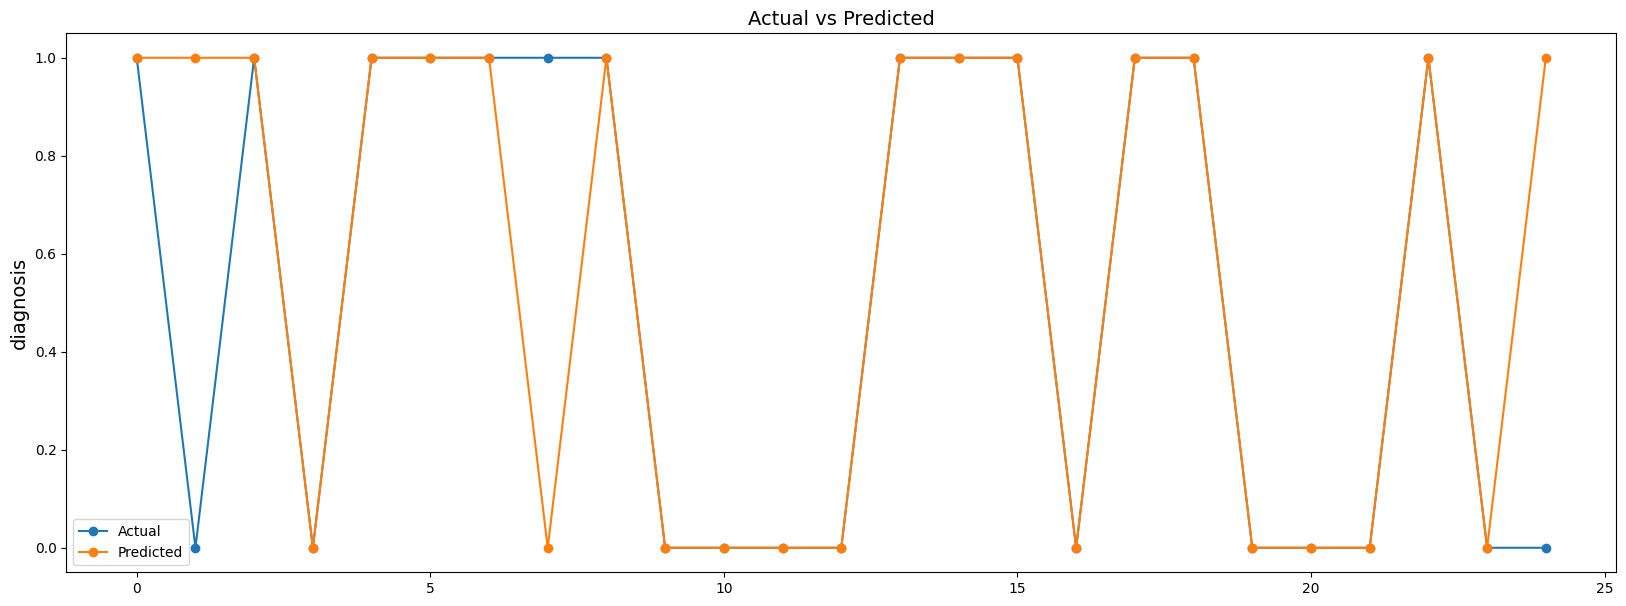

In [202]:
#Decision Tree
model_train('DecisionTreeClassifier',X_train,y_train,X_test,y_test)

---



<center> <b> Random Forest </b></center>



---

<br/>


Testing Performance Metrics for the RandomForestClassifier :

                            R2: 0.89
      Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
                      Accuracy: 97.30%


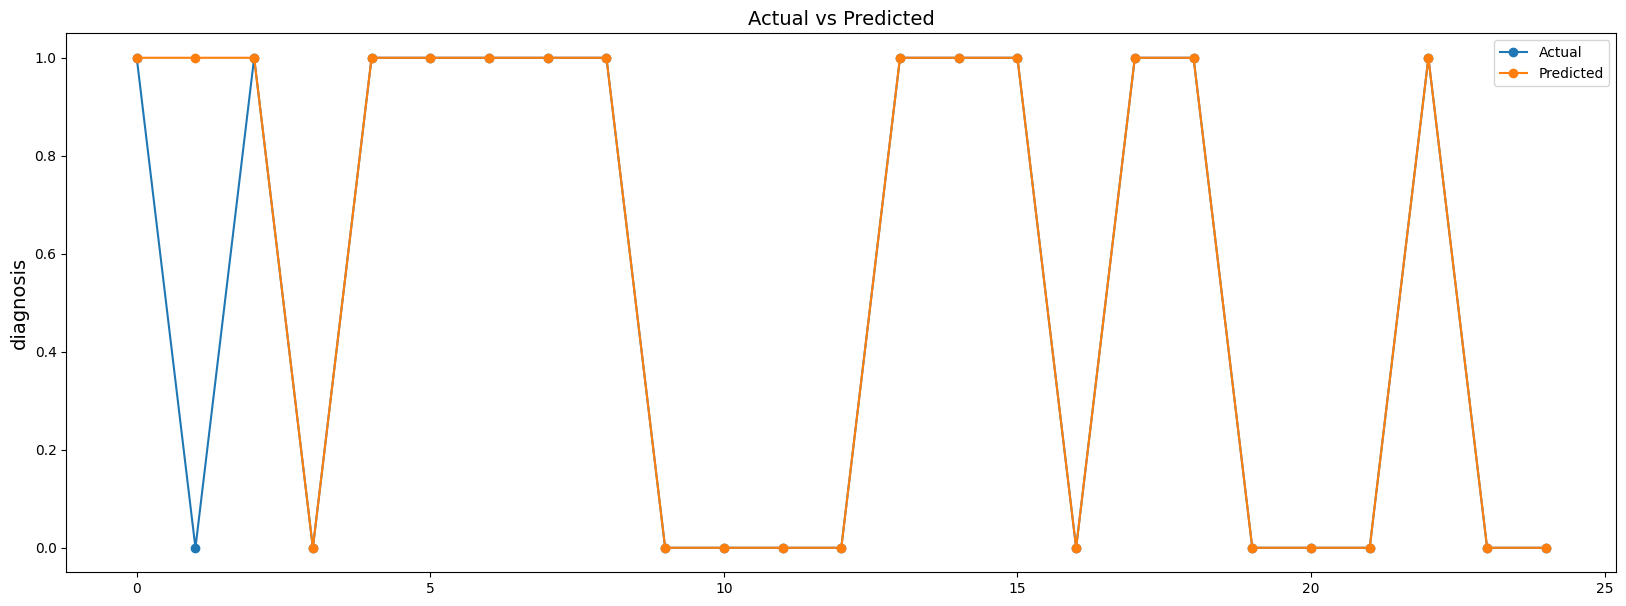

In [203]:
#Random Forest 
model_train('RandomForestClassifier',X_train,y_train,X_test,y_test)

---



<center> <b> SVM </b></center>



---

<br/>


Testing Performance Metrics for the SVC :

                            R2: 0.93
      Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
                      Accuracy: 98.20%


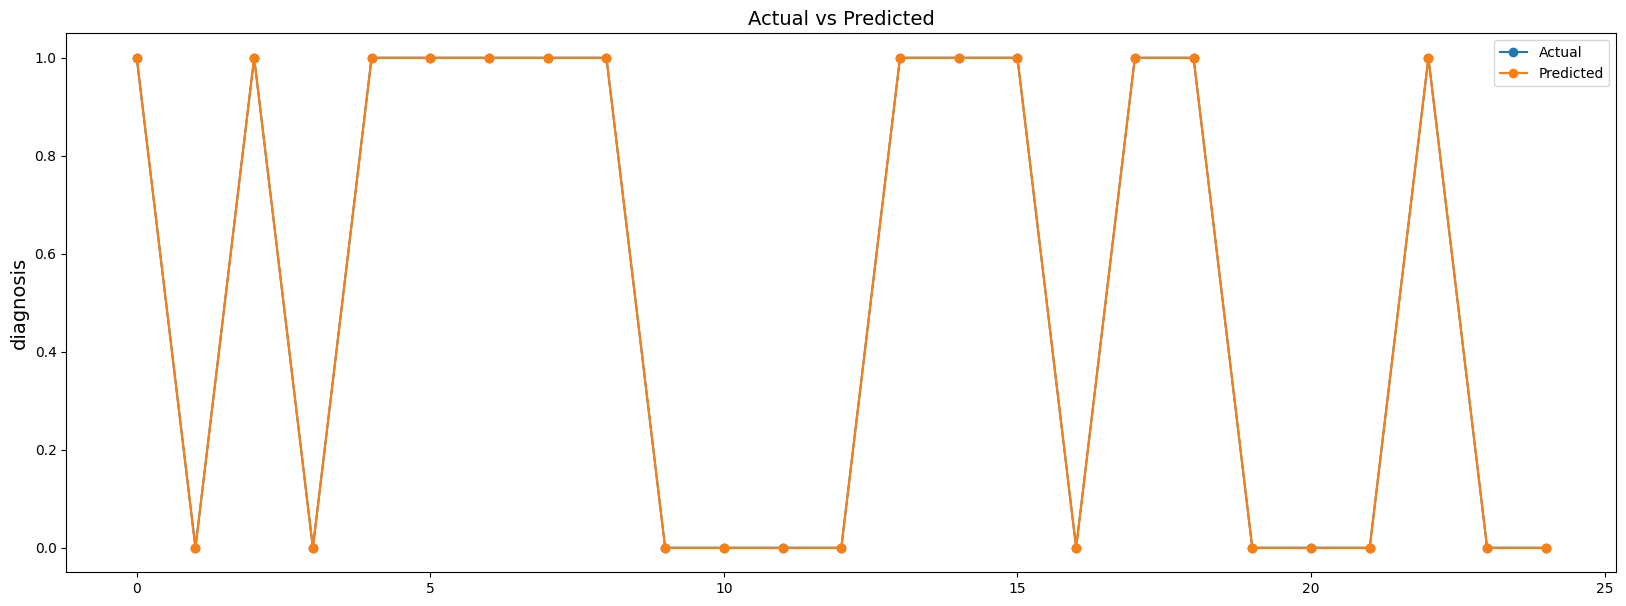

In [204]:
#SVM
model_train('SVC',X_train,y_train,X_test,y_test)

---



<center> <b> Stacked Model </b></center>



---

In [210]:
mse, rmse, r2, acc = stacked_model_train(X_train, y_train, X_test, y_test)


Training Stacked Model...

Testing Performance Metrics for the Stacked Model:
--------------------------------------------------
R2 Score:                0.89
Mean Squared Error (MSE): 0.03
Root Mean Squared Error:  0.16
Accuracy:                97.30%



---



<center> <b> Best Model With feature selection: </b></center>



---

<br/>

In [206]:
best_model()

SVC model is giving highest accuracy : 98.20%


After the results, it is pretty clear that SVM model is giving us the best accuracy for our prediction model.